<a href="https://colab.research.google.com/github/syilmazs/MachineLearning/blob/main/Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [ ]:
#!pip install --upgrade matplotlib==3.4

In [ ]:
# Main libraries
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

In [ ]:
!nvidia-smi

Sun Apr 24 02:04:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#!unrar x "/content/gdrive/MyDrive/creditcard.part1.rar" "/content/gdrive/MyDrive/Caspstone3_Project_Fraud_Detection"

In [ ]:
df =pd.read_csv("/content/gdrive/MyDrive/Caspstone3_Project_Fraud_Detection/creditcard.csv")

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.shape  

(284807, 31)

In [ ]:
df.isnull().any().sum()

0

In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.shape

(283726, 31)

In [ ]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
fig = px.pie(df, values = df['Class'].value_counts(), 
             names = {0: "No Fraud", 1:"Fraud"},  #(df['Class'].value_counts()).index   for only classes 0 and 1
             title = 'Distribution of Classes',width=800,
                   height=600,)
fig.show()

An alternative visuluation. 

In [ ]:
import plotly.graph_objects as go

In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['No Fraud','Fraud']
values = df['Class'].value_counts()
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.2)])
fig.update_traces(textfont_size=20, marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
    height=400,
    width=600,
)
fig.show()

In [ ]:
print(f'Percentage of Fraudulent Transactions  : % {round(df.Class.value_counts(normalize=True)[1]*100,2)}\
      --> ({df.Class.value_counts()[1]} observations for fraudulent transactions)\
      \nPercentage of Normal Transactions: % {round(df.Class.value_counts(normalize=True)[0]*100,2)}\
      --> ({df.Class.value_counts()[0]} observations for normal transactions)')

Percentage of Fraudulent Transactions  : % 0.17      --> (473 observations for fraudulent transactions)      
Percentage of Normal Transactions: % 99.83      --> (283253 observations for normal transactions)


It is obvious that the classes are heavily unbalanced. I need to take into consideration in modelling phase.

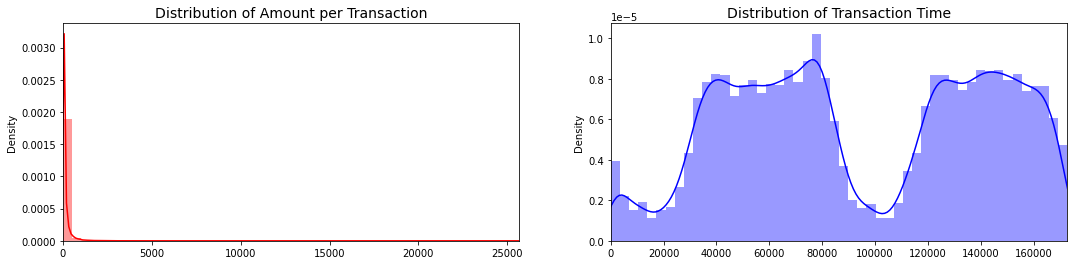

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Amount per Transaction', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()
# source: kaggle

I can see that Amount graph is right skewed. There are some outliers. Time feature is flactuating. I can say that it may caused by different transaction volumes in a day. 

In [ ]:
df.groupby('Class').mean().T

Class,0,1
Time,94835.058093,80450.513742
V1,0.013439,-4.498280
V2,-0.009829,3.405965
V3,0.012853,-6.729599
V4,-0.010440,4.472591
V5,0.006769,-2.957197
V6,0.001251,-1.432518
V7,0.010447,-5.175912
V8,-0.002448,0.953255
V9,0.002613,-2.522124


Most of the features having opposite effect on the classes. 

In [ ]:
df[df.Class ==1].describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Time,473.000000,80450.513742,48636.179973,406.000000,41203.000000,73408.000000,129095.000000,170348.000000
V1,473.000000,-4.498280,6.593145,-30.552380,-5.603690,-2.271755,-0.361428,2.132386
V2,473.000000,3.405965,4.122500,-8.402154,1.145381,2.617105,4.571743,22.057729
V3,473.000000,-6.729599,6.909647,-31.103685,-7.926507,-4.875397,-2.171454,2.250210
V4,473.000000,4.472591,2.871523,-1.313275,2.288644,4.100098,6.290918,12.114672
V5,473.000000,-2.957197,5.278831,-22.105532,-4.278983,-1.372245,0.260821,11.095089
V6,473.000000,-1.432518,1.715347,-6.406267,-2.450444,-1.420468,-0.413647,6.474115
V7,473.000000,-5.175912,6.858024,-43.557242,-6.989195,-2.902079,-0.907188,5.802537
V8,473.000000,0.953255,5.585950,-41.044261,-0.161518,0.617738,1.709417,20.007208
V9,473.000000,-2.522124,2.465047,-13.434066,-3.796760,-2.099049,-0.788388,3.353525


In [ ]:
df[df.Class ==0].describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Time,283253.000000,94835.058093,47475.550607,0.000000,54233.000000,84711.000000,139308.000000,172792.000000
V1,283253.000000,0.013439,1.922179,-56.407510,-0.913431,0.022562,1.316788,2.454930
V2,283253.000000,-0.009829,1.633520,-72.715728,-0.601398,0.062561,0.797012,18.902453
V3,283253.000000,0.012853,1.457593,-48.325589,-0.883966,0.182247,1.028261,9.382558
V4,283253.000000,-0.010440,1.398575,-5.683171,-0.851605,-0.024500,0.734231,16.875344
V5,283253.000000,0.006769,1.355816,-113.743307,-0.687888,-0.052807,0.612442,34.801666
V6,283253.000000,0.001251,1.329914,-26.160506,-0.767543,-0.274172,0.397678,73.301626
V7,283253.000000,0.010447,1.177480,-31.764946,-0.550146,0.041664,0.571029,120.589494
V8,283253.000000,-0.002448,1.157140,-73.216718,-0.208841,0.021633,0.324473,18.709255
V9,283253.000000,0.002613,1.086902,-6.290730,-0.641649,-0.051368,0.596969,15.594995


In [ ]:
df.groupby("Class")["Amount"].mean()

Class
0     88.413575
1    123.871860
Name: Amount, dtype: float64

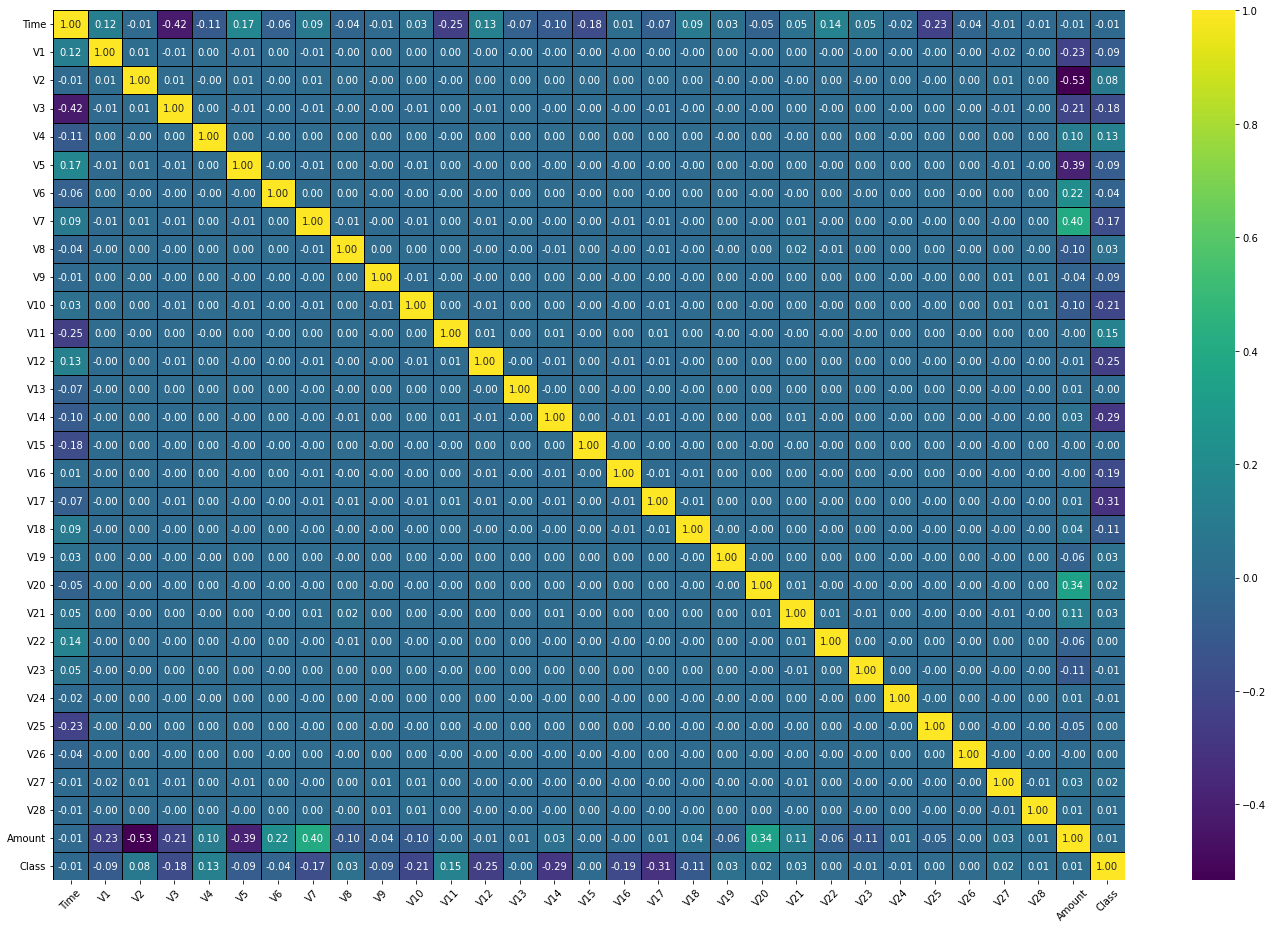

In [ ]:
plt.figure(figsize = (24,16))
sns.heatmap (df.corr(), annot = True, fmt = '.2f', linewidths=1, linecolor="black", cmap="viridis")
plt.xticks(rotation = 45);

I can say that there is not a multicollineriaty problem in the data. The biggest correlation value is -0.53 between Amount and V2 features.

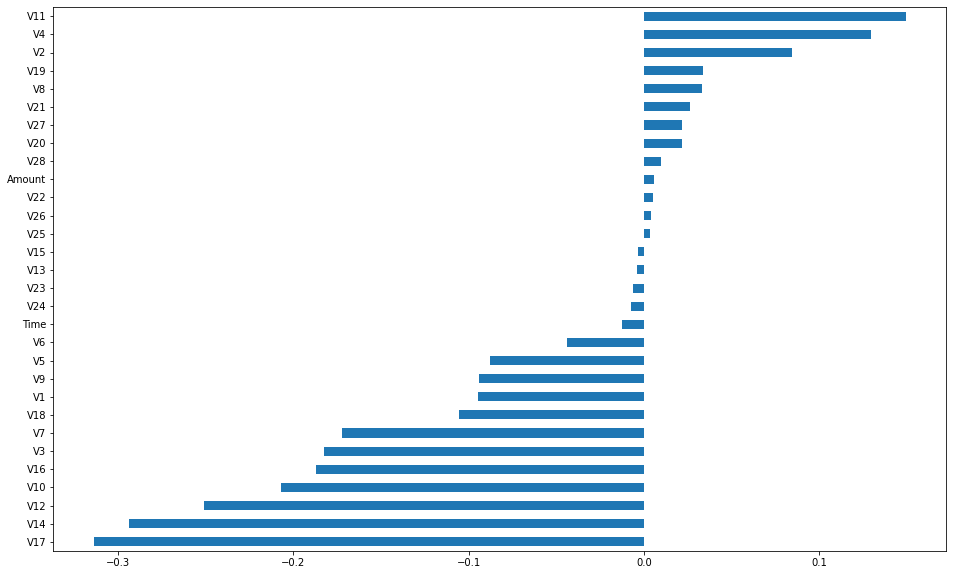

In [ ]:
plt.figure(figsize=(16,10))
df.corr()['Class'].sort_values().drop('Class').plot(kind = 'barh');

I can say that V17, V14, V12, V10, V16, V3 and V7 having negative correlation with Fraud Class. On the other hand, V11, V4 and V2 are positively correlated with Fraud. These features have more importance on the Fraud detection.

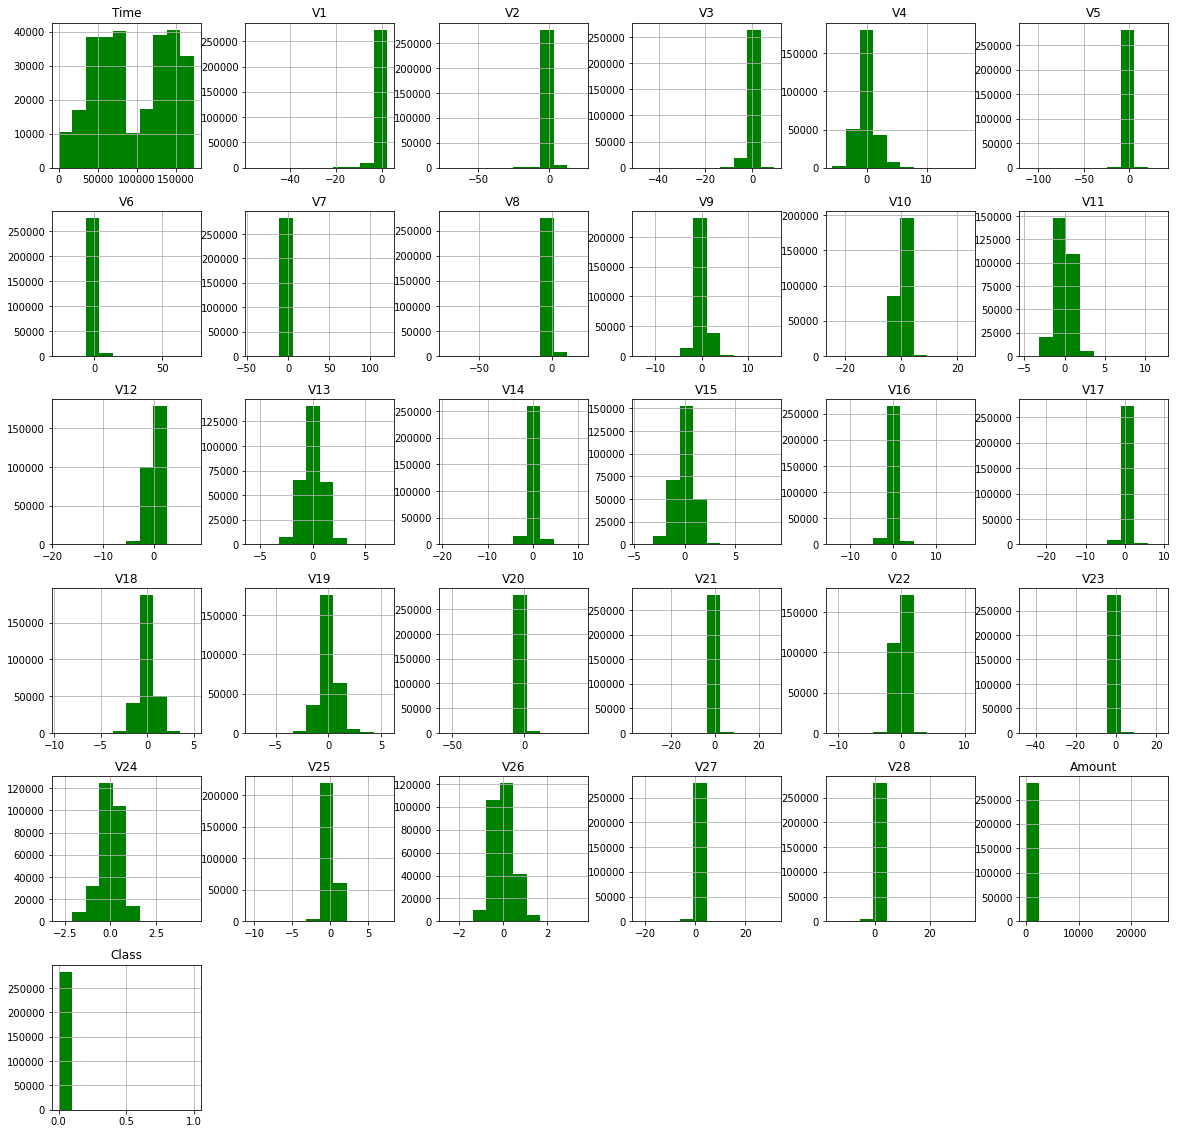

In [ ]:
df.hist(linewidth=1, histtype='stepfilled', facecolor='g', figsize=(20, 20));

As we can see that all the features were scaled except Time and Amount features.

In [ ]:
df2 = df.copy()  # I take a copy of df before feture engineering.

In [ ]:
3600*24 # total seconds in a day

86400

In [ ]:
df[df.Time>=86400][0:1] # to find the first index of the second day

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
144786,86400.0,2.071076,-1.149855,-0.588271,-0.915774,-1.013029,-0.257111,-1.081681,-0.030873,0.097238,...,0.422394,1.131042,0.114837,0.646537,-0.195425,-0.095249,0.005479,-0.029969,63.48,0


## **Feature Engineering**

In [ ]:
# create a list of our conditions
conditions = [
    (df.index < 144786),
    (df.index>= 144786)
    ]

# create a list of the values we want to assign for each condition
values = ['Day1', 'Day2']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Day'] = np.select(conditions, values)

In [ ]:
# Looking at the datset, we can infer that the dataset contains two days of traction or the record spans a  48 hours period. 
# Therefore, I have generated the hour of transaction by assuming that the first seconds of a day is 0 and the last one 86399, Hence:

df['Hour'] = ((np.where(df['Time'] > 86399 , df['Time'] - 86399 , df['Time'])) % (24 *3600) // 3600).astype(int)
 
#temptime = np.where(df['Time'] > 86399 , df['Time'] - 86399 , df['Time'])
#df['Hour'] = df['Hour'].astype(int)

In [ ]:
df.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Day,Hour
269352,163635.0,1.987715,-0.454950,-0.342316,0.361783,-0.926333,-0.824757,-0.642505,0.075885,1.738279,...,0.393386,-0.147519,-0.474891,-0.911807,0.044702,-0.033358,1.00,0,Day2,21
277168,167500.0,1.939396,0.355887,-2.623460,2.692007,3.188438,3.952238,-0.054816,0.805524,-1.306277,...,-0.035741,0.723664,0.462805,0.313820,-0.044495,-0.069757,11.35,0,Day2,22
275770,166716.0,0.419821,-3.607483,-3.794893,-0.212382,-0.480325,-1.012327,1.732412,-0.846674,-1.112480,...,-1.098326,0.617403,0.450733,0.178744,-0.289637,0.082280,1000.00,0,Day2,22


In [ ]:
df.drop(columns="Time", axis=1, inplace=True) # I drop the Time feature which is meaningless for the model.

In [ ]:
column_to_move = df.pop("Hour")
df.insert(0, "Hour", column_to_move)

In [ ]:
column_to_move = df.pop("Day")
df.insert(0, "Day", column_to_move)

In [ ]:
column_to_move = df.pop("Amount")
df.insert(0, "Amount", column_to_move)

In [ ]:
df.sample()

,Amount,Day,Hour,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
42296,253.02,Day1,11,0.721059,-0.448454,-0.001645,1.267115,-0.294658,-0.398997,0.496903,...,0.355478,0.210267,0.141679,-0.29322,0.10988,0.536566,-0.326543,-0.014224,0.061085,0


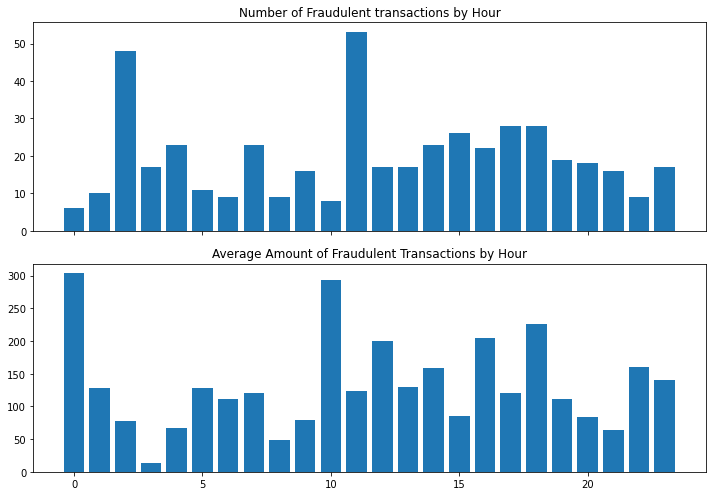

In [ ]:
# First we limit the dataframe to where a fraudulent activity was identify
df_fraud = df[df['Class'] == 1]

# group by Hour, then count of fradulent transaction
d1 = df_fraud[['Class','Hour']]

d1 = d1.groupby(['Hour']).count()
d1.reset_index(level=0, inplace=True)

# group by Hour, then average Amount of fradulent transaction
d2 = df_fraud[['Amount','Hour']]
d2 = d2.groupby(['Hour']).mean()
d2.reset_index(level=0, inplace=True)


#Lets do a quick plot to visualise the df
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10,7))

ax1.bar(d1.Hour, d1.Class)
ax1.set_title('Number of Fraudulent transactions by Hour')
ax2.bar(d2.Hour, d2.Amount)
ax2.set_title('Average Amount of Fraudulent Transactions by Hour')

fig.tight_layout()
plt.show()

#source:kaggle

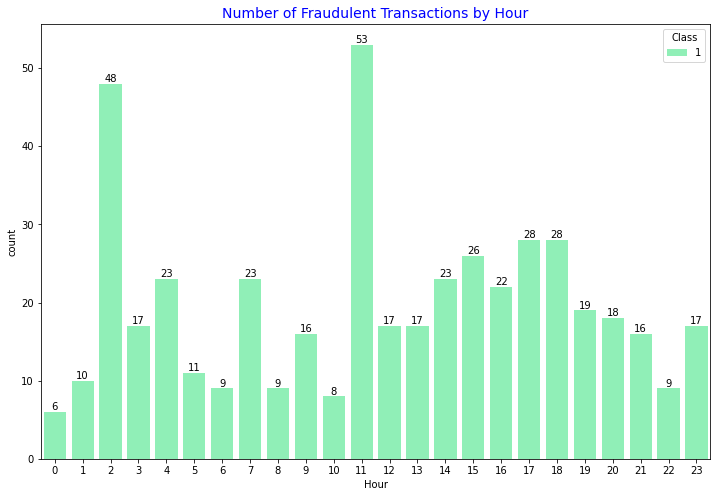

In [ ]:
plt.figure(figsize=(12, 8))

plt.title("Number of Fraudulent Transactions by Hour", c="blue", size=14)
ax1 = sns.countplot(x="Hour", hue="Class", data=df_fraud, palette = 'rainbow')
ax1.bar_label(ax1.containers[0], label_type="edge")
plt.show()

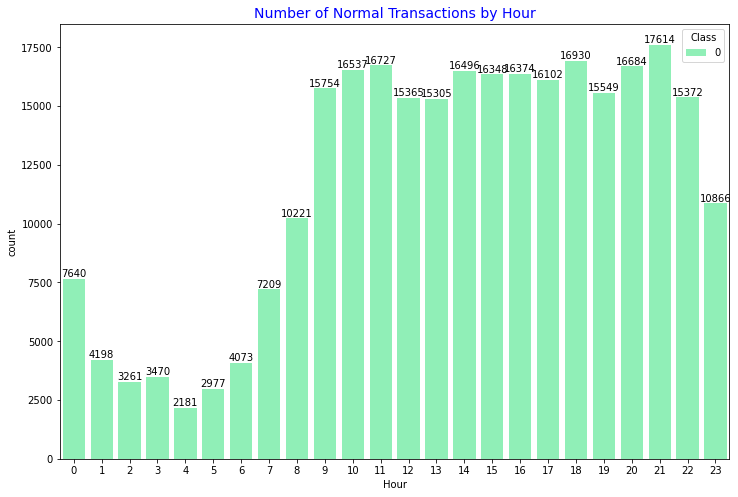

In [ ]:
plt.figure(figsize=(12, 8))

plt.title("Number of Normal Transactions by Hour", c="blue", size=14)
ax1 = sns.countplot(x="Hour", hue="Class", data=df[df.Class==0], palette = 'rainbow')
ax1.bar_label(ax1.containers[0], label_type="edge")
plt.show()

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0].sample(473)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Amount,Day,Hour,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
76609,7.52,Day1,15,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,...,-0.460390,-0.090527,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,1
52584,1.00,Day1,12,-1.519244,2.308492,-1.503599,2.064101,-1.000845,-1.016897,-2.059731,...,0.175019,1.307871,0.102826,-0.017746,0.149696,-0.096602,-0.369115,-0.019244,-0.208319,1
141002,1000.00,Day1,23,-2.821818,-3.759180,0.102038,-1.971130,-2.100087,0.822320,2.655760,...,2.364460,0.132012,-1.253844,2.265362,-1.184191,0.869260,-0.494328,-0.082086,0.210577,0
39183,776.83,Day1,11,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,...,1.784449,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,1
125342,106.90,Day1,21,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,...,-0.616949,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,1


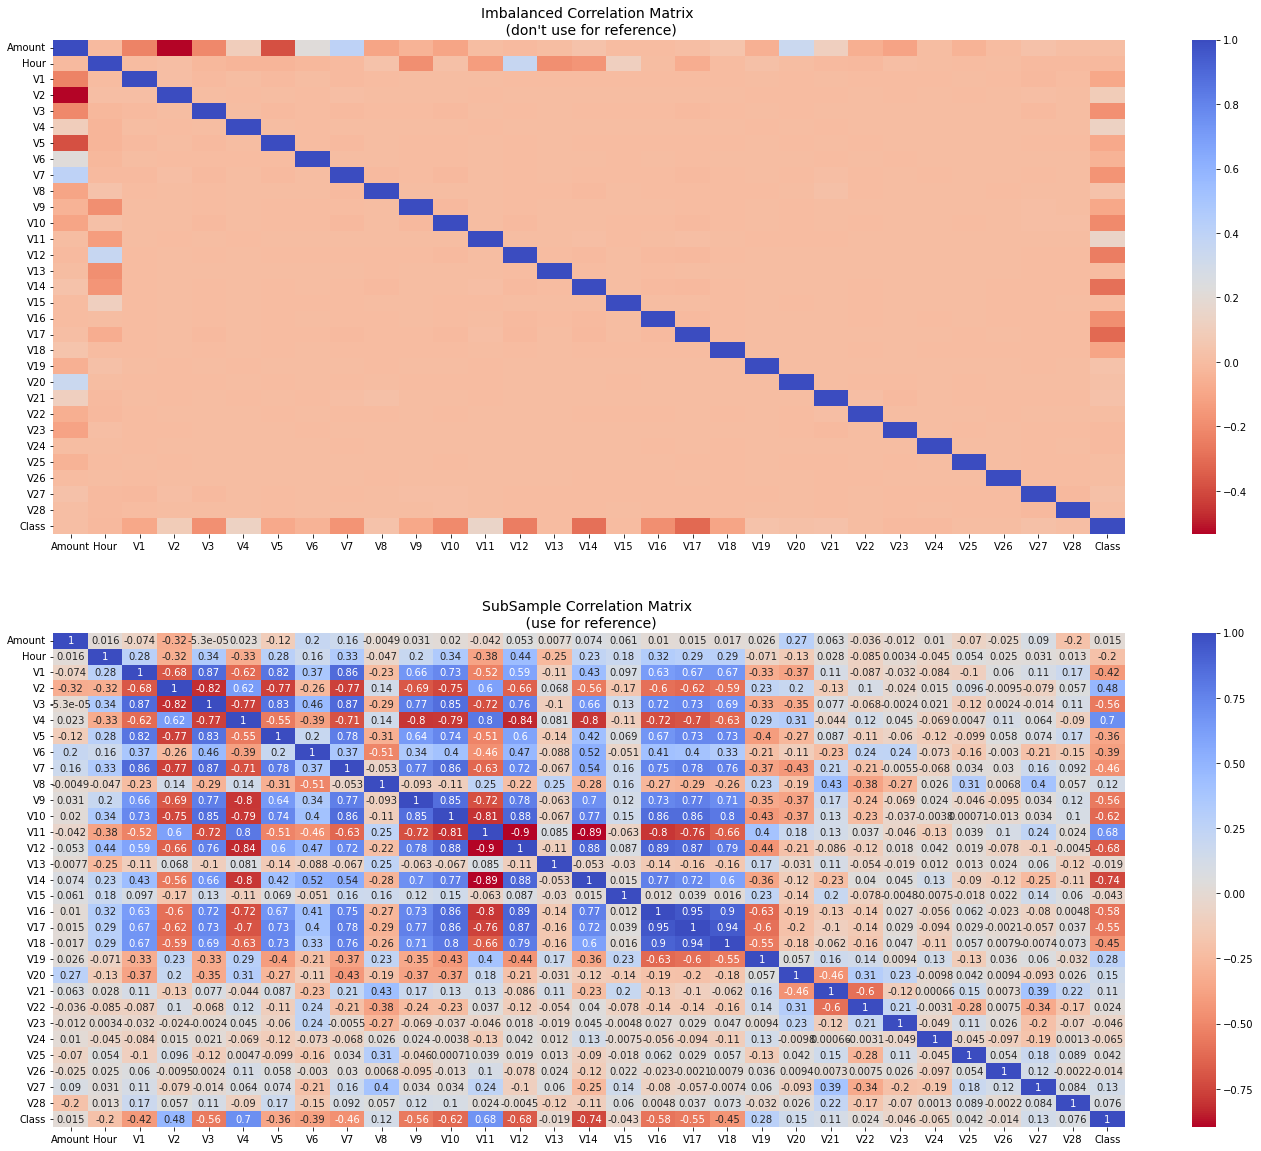

In [ ]:
# I use subsampling to get a better insight in terms of correlation. Because data set is heavily imbalanced.

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':10}, ax=ax2, annot=True)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

**As I can see that in the first heat map there is not any multicollinierity issue. However, with equalized classes we get a very different heatmap. There are some strongly correlated features. **

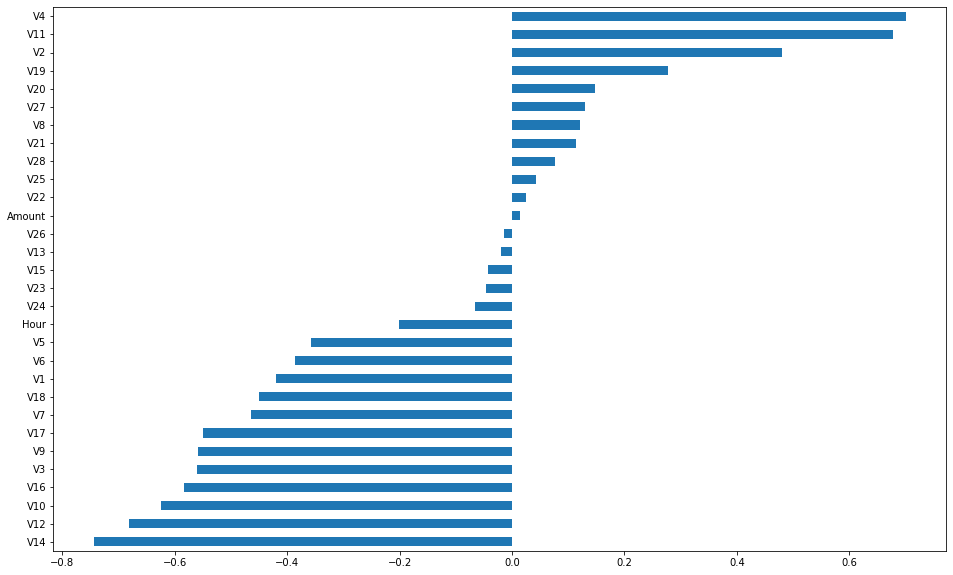

In [ ]:
plt.figure(figsize=(16,10))
new_df.corr()['Class'].sort_values().drop('Class').plot(kind = 'barh');

In [ ]:
df_temp = new_df.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .85 and df_temp[col][i] < 1) or (df_temp[col][i]< -.85 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(f"multicolinearity alert in between {col} - {i}")

multicolinearity alert in between V1 - V3
multicolinearity alert in between V1 - V7
multicolinearity alert in between V3 - V1
multicolinearity alert in between V3 - V7
multicolinearity alert in between V3 - V10
multicolinearity alert in between V7 - V1
multicolinearity alert in between V7 - V3
multicolinearity alert in between V7 - V10
multicolinearity alert in between V10 - V3
multicolinearity alert in between V10 - V7
multicolinearity alert in between V10 - V12
multicolinearity alert in between V10 - V16
multicolinearity alert in between V10 - V17
multicolinearity alert in between V11 - V12
multicolinearity alert in between V11 - V14
multicolinearity alert in between V12 - V10
multicolinearity alert in between V12 - V11
multicolinearity alert in between V12 - V14
multicolinearity alert in between V12 - V16
multicolinearity alert in between V12 - V17
multicolinearity alert in between V14 - V11
multicolinearity alert in between V14 - V12
multicolinearity alert in between V16 - V10
mult

**I decided to continue with selected features both to deal with multicollinierity issue and reduce computational cost. **

In [ ]:
df_imp = df[["Amount", "Hour", "V1", "V2", "V4", "V6", "V8", "V9", "V10", "V13", "V14", "V15", "V16", "V19", "V20", "V21","V22", "V23","V24", "V25", "V26", "V27", "V28", "Class"]] # df_imp consists of selected features.

In [ ]:
df_imp

,Amount,Hour,V1,V2,V4,V6,V8,V9,V10,V13,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
282679,15.09,23,1.804109,0.190894,3.666770,1.058732,0.349826,-0.581224,1.514284,0.384547,...,-0.204968,0.291584,0.897386,0.171686,0.700226,-0.207600,0.035004,0.011581,-0.032954,0
58884,590.84,13,0.079682,-1.680813,1.479933,0.628367,-0.010513,-0.122203,-0.133201,-0.619383,...,0.995363,0.335758,-0.234515,-0.746715,-0.805456,0.614738,-0.255753,-0.094482,0.092390,0
179529,61.74,10,2.004599,-1.220997,-0.369878,-0.687817,-0.049062,0.630105,0.622334,-0.940095,...,-0.594130,-0.131406,0.171669,0.156381,0.020174,-0.286978,0.165449,0.020006,-0.032711,0
279447,2.69,22,-0.091920,1.272585,-0.620233,-0.735574,-0.137214,-0.028162,-0.565449,1.156048,...,0.209872,-0.356404,-0.746042,0.089414,0.527653,-0.342465,0.120335,0.341871,0.145319,0
273585,90.00,22,1.836088,-0.706391,0.316438,-0.272591,0.067706,1.577421,-0.214376,-1.233078,...,-0.125941,0.257974,0.650903,0.101837,0.639349,-0.131424,-0.593727,0.032217,-0.014946,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81698,591.12,16,0.044825,-1.532107,1.619995,-0.467983,-0.279701,-0.144005,-0.308981,0.232957,...,1.021928,0.434473,0.008468,-0.548810,0.448431,0.362880,-0.382192,-0.078856,0.122870,0
7667,4.99,2,-0.636393,0.820481,1.091706,0.350480,-0.046477,1.893215,-0.352846,1.076185,...,0.128289,-0.262144,-0.053601,-0.189245,-0.195063,0.009735,-0.354480,0.099431,-0.062962,0
223857,45.00,15,1.863110,-0.366371,1.266312,0.277019,0.166159,1.152601,0.110677,0.314579,...,-0.132736,0.068728,0.256316,0.269377,0.562313,-0.328641,-0.782494,0.069976,-0.007723,0
222602,7.70,15,-1.829690,2.050740,-1.484203,-1.404055,0.254452,0.652165,1.383401,-2.144703,...,0.422893,0.081288,0.659280,-0.111991,-0.515029,0.016241,0.137662,0.870989,0.629460,0


###Dealing with Time feature

Total number of transactions in the AFTERNOON : 97699
Total number of transactions in the EVENING : 76164
Total number of transactions in the MORNING : 81939
Total number of transactions in the NIGHT : 27924


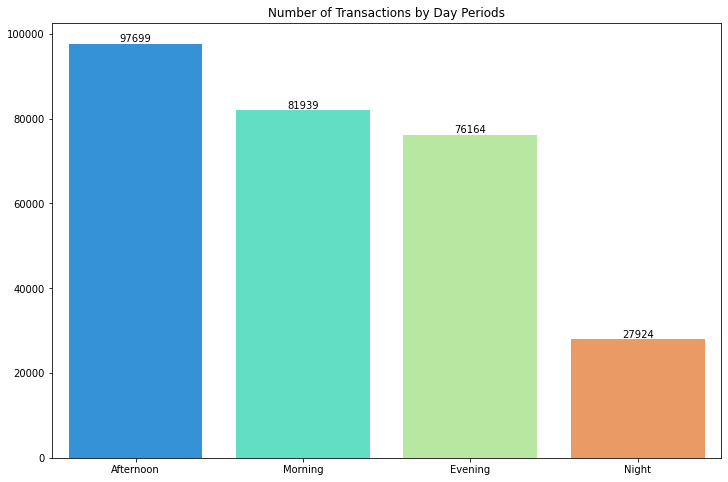

In [ ]:
def time_period(x):
    
    """This function classifies periods in a day!!!"""
    
    if x <= 6:
        return "Night"
    elif x <= 12:
        return "Morning"
    elif x <= 18:
        return "Afternoon"
    else:
        return "Evening"
    
df["Hour_Class"] = df["Hour"].apply(time_period)

for i in df.groupby("Hour_Class")["Class"].count().index:
    print("Total number of transactions in the", i.upper(),":", df.groupby("Hour_Class")["Class"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Number of Transactions by Day Periods")
ax = sns.barplot(x=df["Hour_Class"].value_counts().index, y=df["Hour_Class"].value_counts().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
df.groupby(["Day", "Hour_Class"]).Amount.mean()

Day   Hour_Class
Day1  Afternoon     100.047914
      Evening        74.123716
      Morning       105.501055
      Night          64.058234
Day2  Afternoon      94.630766
      Evening        71.510399
      Morning        97.486627
      Night          59.694365
Name: Amount, dtype: float64

In [ ]:
df_fraud = df[df['Class'] == 1]
df_fraud.sample()

,Amount,Day,Hour,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour_Class
76555,153.46,Day1,15,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,...,0.077739,1.092437,0.320133,-0.434643,-0.380687,0.21363,0.42362,-0.105169,1,Afternoon


In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['Day1','Day2']
values = df['Day'].value_counts()
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.2)])
fig.update_traces(textfont_size=20, marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Number of Transactions by Day",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
    height=400,
    width=600,
)
fig.show()

In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['Day1','Day2']
values = df_fraud['Day'].value_counts()
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.2)])
fig.update_traces(textfont_size=20, marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Number of Fraudible Transactions by Day",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
    height=400,
    width=600,
)
fig.show()

In [ ]:
df_fraud.groupby(["Day", "Hour_Class"]).Amount.mean()

Day   Hour_Class
Day1  Afternoon     164.701389
      Evening       126.070889
      Morning       100.499485
      Night          89.462069
Day2  Afternoon     144.842917
      Evening        82.391176
      Morning       242.158966
      Night          88.937121
Name: Amount, dtype: float64

In [ ]:
df_fraud.groupby(["Day", "Hour_Class"]).Amount.count().sort_values()

Day   Hour_Class
Day2  Morning       29
      Evening       34
Day1  Evening       45
      Night         58
Day2  Night         66
Day1  Afternoon     72
Day2  Afternoon     72
Day1  Morning       97
Name: Amount, dtype: int64

In [ ]:
df.groupby(["Day", "Hour_Class"]).Amount.count().sort_values()

Day   Hour_Class
Day2  Night         13806
Day1  Night         14118
Day2  Evening       34400
Day1  Morning       40778
Day2  Morning       41161
Day1  Evening       41764
      Afternoon     47576
Day2  Afternoon     50123
Name: Amount, dtype: int64

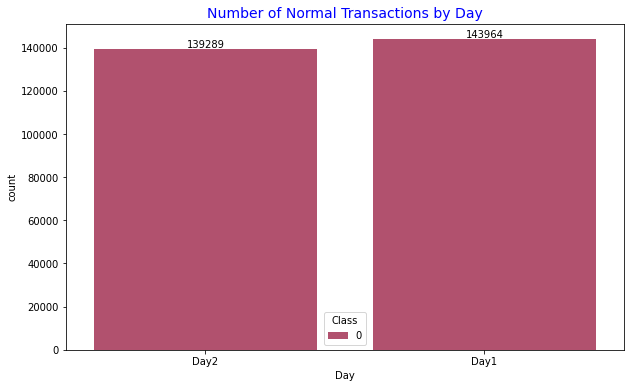

In [ ]:
plt.figure(figsize=(10, 6))

plt.title("Number of Normal Transactions by Day", c="blue", size=14)
ax1 = sns.countplot(x="Day", hue="Class", data=df[df.Class==0], palette = 'flare')
ax1.bar_label(ax1.containers[0], label_type="edge")
plt.show()

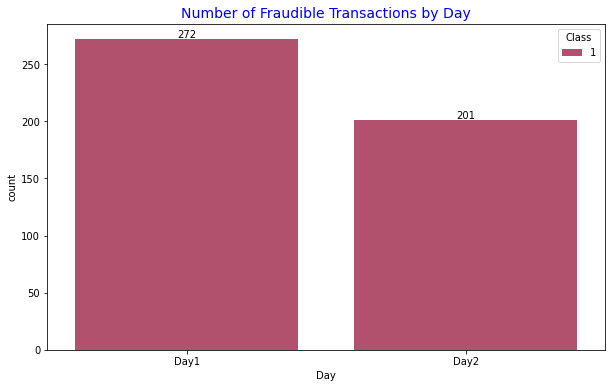

In [ ]:
plt.figure(figsize=(10, 6))

plt.title("Number of Fraudible Transactions by Day", c="blue", size=14)
ax1 = sns.countplot(x="Day", hue="Class", data=df[df.Class==1], palette = 'flare')
ax1.bar_label(ax1.containers[0], label_type="edge")
plt.show()

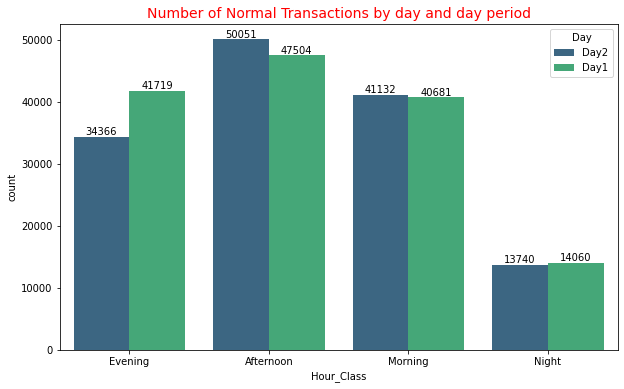

In [ ]:
plt.figure(figsize=(10, 6))

plt.title("Number of Normal Transactions by day and day period", c="red", size=14)
ax1 = sns.countplot(x="Hour_Class", hue="Day", data=df[df.Class==0], palette = 'viridis')
ax1.bar_label(ax1.containers[0], label_type="edge")
ax1.bar_label(ax1.containers[1], label_type="edge")
plt.show()

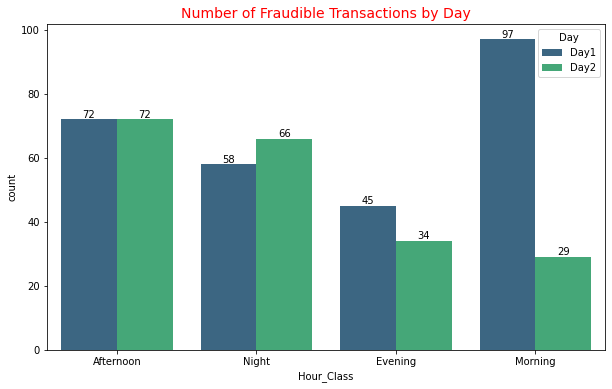

In [ ]:
plt.figure(figsize=(10, 6))

plt.title("Number of Fraudible Transactions by Day", c="red", size=14)
ax1 = sns.countplot(x="Hour_Class", hue="Day", data=df[df.Class==1], palette = 'viridis')
ax1.bar_label(ax1.containers[0], label_type="edge")
ax1.bar_label(ax1.containers[1], label_type="edge")
plt.show()

##I can say that portion of fradulent transactions in night hours relatively higher than normal transactions. 

## Dealing with Amount Feature

Average amount of transactions in the AFTERNOON : 97.26872782730631
Average amount of transactions in the EVENING : 72.94339333543407
Average amount of transactions in the MORNING : 101.47511038699521
Average amount of transactions in the NIGHT : 61.90067898581865


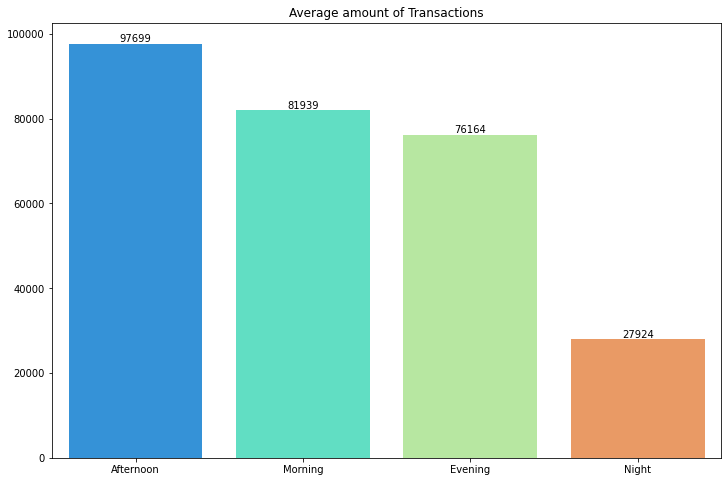

In [ ]:
for i in df.groupby("Hour_Class")["Amount"].mean().index:
    print("Average amount of transactions in the", i.upper(),":", df.groupby("Hour_Class")["Amount"].mean().loc[i])

plt.figure(figsize=(12,8))
plt.title("Average amount of Transactions")
ax = sns.barplot(x=df["Hour_Class"].value_counts().index, y=df["Hour_Class"].value_counts().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
df_fraud.sample()

,Amount,Day,Hour,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour_Class
120837,99.9,Day1,21,-5.140723,3.568751,-5.896245,4.16472,-4.091193,-1.98996,-5.472436,...,1.13113,0.118022,-0.332704,0.139941,0.324758,-0.180769,0.17781,0.661555,1,Evening


Total number of fraudulent transactions in the : Hour_Class  Day 
Afternoon   Day1    164.701389
            Day2    144.842917
Evening     Day1    126.070889
            Day2     82.391176
Morning     Day1    100.499485
            Day2    242.158966
Night       Day1     89.462069
            Day2     88.937121
Name: Amount, dtype: float64


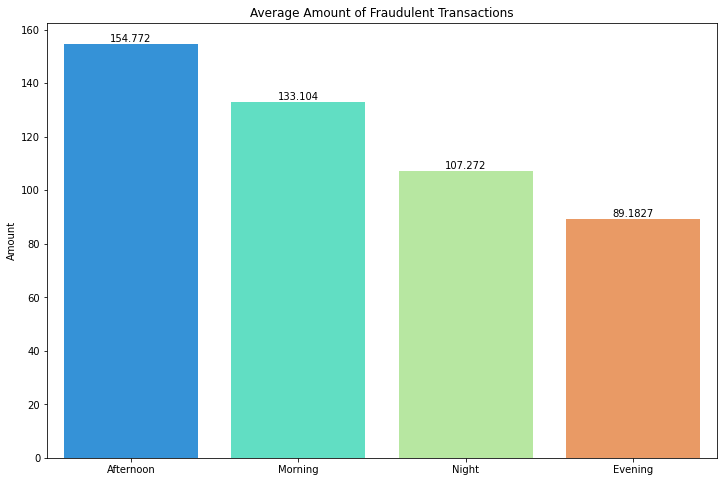

In [ ]:
print("Total number of fraudulent transactions in the",":", df_fraud.groupby(["Hour_Class", "Day"])["Amount"].mean())

plt.figure(figsize=(12,8))
plt.title("Average Amount of Fraudulent Transactions")
ax = sns.barplot(x=df_fraud["Hour_Class"].value_counts().index, y=df_fraud.groupby("Hour_Class")["Amount"].mean().sort_values(ascending=False), data=df_fraud, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

Average amount of fraudulent transactions in the : Hour_Class  Day 
Afternoon   Day1    164.701389
            Day2    144.842917
Evening     Day1    126.070889
            Day2     82.391176
Morning     Day1    100.499485
            Day2    242.158966
Night       Day1     89.462069
            Day2     88.937121
Name: Amount, dtype: float64


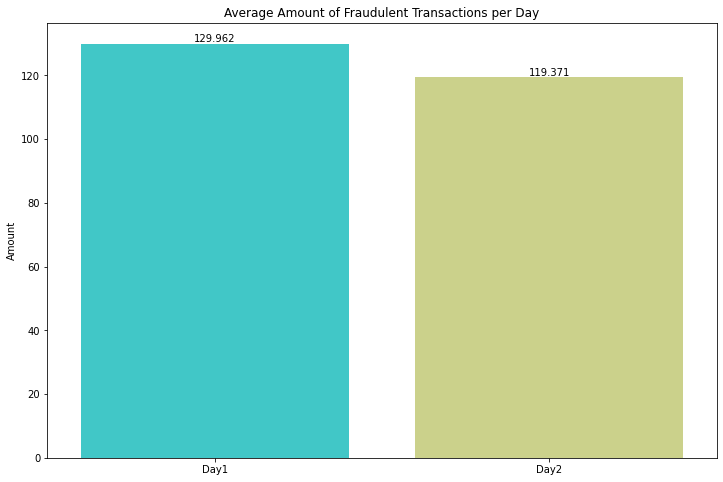

In [ ]:
print("Average amount of fraudulent transactions in the",":", df_fraud.groupby(["Hour_Class", "Day"])["Amount"].mean())

plt.figure(figsize=(12,8))
plt.title("Average Amount of Fraudulent Transactions per Day")
ax = sns.barplot(x=df_fraud["Day"].value_counts().index, y=df_fraud.groupby("Day")["Amount"].mean().sort_values(ascending=False), data=df_fraud, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

### *I have only two days data. I can see that there is similar distribution of normal transaction volume between these days. However, fraudulent transactions do not have similar distribution between days. It is not obvious to make conlusions regarding the distribution of fraudible transactions in a day. But I can say that fraudible transactions relatively have more transaction volume during night hours.

Total number of fraudulent transactions in the AFTERNOON : 144
Total number of fraudulent transactions in the EVENING : 79
Total number of fraudulent transactions in the MORNING : 126
Total number of fraudulent transactions in the NIGHT : 124


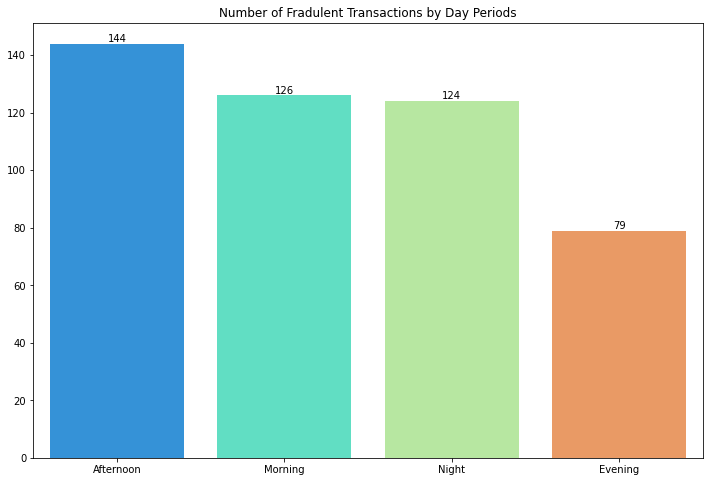

In [ ]:
for i in df_fraud.groupby("Hour_Class")["Class"].count().index:
    print("Total number of fraudulent transactions in the", i.upper(),":", df_fraud.groupby("Hour_Class")["Class"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Number of Fradulent Transactions by Day Periods")
ax = sns.barplot(x=df_fraud["Hour_Class"].value_counts().index, y=df_fraud["Hour_Class"].value_counts().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

### Data Cleaning
Check Missing Values and Outliers

In [ ]:
df.isnull().any().sum()

0

In [ ]:
!pip install colorama

In [ ]:
# Libraries for Style
from colorama import Fore, Style
from termcolor import colored, cprint

In [ ]:
# OUTLIERS

iqr_factor = [1.5, 2]
list1, list2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'Outliers for {factor} IQR :')
    print('-------------------------------------')
    for col in df2.iloc[:, :].columns:
    
        IQR = df2[col].quantile(0.75) - df2[col].quantile(0.25)
        lower_lim = df2[col].quantile(0.25) - factor*IQR
        upper_lim = df2[col].quantile(0.75) + factor*IQR
    
        cond = df2[(df2[col] < lower_lim) | (df2[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 2:
            list1.append(df2[(df2[col] < lower_lim) | (df2[col] > upper_lim)].index.tolist())
        if cond > 0 and factor == 3:
            list2.append(df2[(df2[col] < lower_lim) | (df2[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<30} : ', cond); count += cond
    print(f'\n{Fore.BLUE}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
    print('')

Outliers for 1.5 IQR :
-------------------------------------
V1                             :  6948
V2                             :  13390
V3                             :  3306
V4                             :  11094
V5                             :  12221
V6                             :  22886
V7                             :  8839
V8                             :  23904
V9                             :  8199
V10                            :  9345
V11                            :  735
V12                            :  15282
V13                            :  3362
V14                            :  14060
V15                            :  2884
V16                            :  8180
V17                            :  7353
V18                            :  7468
V19                            :  10150
V20                            :  27553
V21                            :  14401
V22                            :  1298
V23                            :  18467
V24                            :

I have limited information regarding the features. Therefore it is not plausible to remove outliers. I will keep them except Amount. 

## Dealing with Outliers in Amount

In [ ]:
df.groupby("Class")["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


In [ ]:
df.groupby("Hour_Class")["Amount"].mean()

Hour_Class
Afternoon     97.268728
Evening       72.943393
Morning      101.475110
Night         61.900679
Name: Amount, dtype: float64

In [ ]:
df.Amount.describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:>

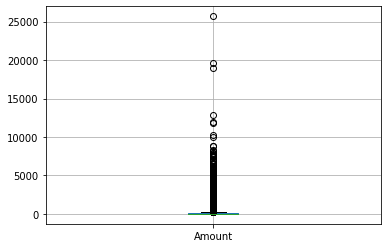

In [ ]:
df.boxplot("Amount")

In [ ]:
df[df.Amount>=5000].Amount.count()

55

In [ ]:
df[df.Amount>=2500].Amount.count()

449

In [ ]:
449/df.shape[0]

0.0015825127059205008

In [ ]:
df[(df.Amount>=1000) & (df.Class==1)].Amount.count()

9

In [ ]:
df[df.Amount>=5000].Amount.count()

55

In [ ]:
IQR = df.Amount.quantile(0.75) - df.Amount.quantile(0.25)
upper_lim = df.Amount.quantile(0.75) + 30*IQR

In [ ]:
upper_lim

2234.8100000000004

In [ ]:
df[df.Amount>upper_lim].Amount.count()

549

In [ ]:
df[(df.Amount>upper_lim) & (df.Class==1)].Amount.count()

0

In [ ]:
drop_index = df[df.Amount>upper_lim].index

In [ ]:
df.drop(index=drop_index, inplace=True)  # I dropped extreme amount values which are over of 30 IQR value.

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.drop(columns="Hour", axis=1, inplace=True)

In [ ]:
column_to_move = df.pop("Hour_Class")
df.insert(0, "Hour_Class", column_to_move)

In [ ]:
column_to_move = df.pop("Amount")
df.insert(0, "Amount", column_to_move)

In [ ]:
df.sample()

,Amount,Hour_Class,Day,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
82419,3.76,Morning,Day1,1.193089,-0.233935,0.564766,-0.211253,-0.680872,-0.2704,-0.485049,...,-0.177076,-0.070551,-0.266166,0.129661,0.027866,-0.035542,0.922087,-0.067848,-0.007152,0


**I decided to classify amount values.**

In [ ]:
def amount_class(x):
    
    """This function classifies amounts!!!"""
    
    if x <= 20:
        return "Low"
    elif x <= 100:
        return "Middle"
    elif x <= 500:
        return "High"
    else:
        return "VeryHigh"
    
df["Amount_Class"] = df["Amount"].apply(amount_class)


In [ ]:
df

,Amount,Hour_Class,Day,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Class
0,15.09,Evening,Day2,1.804109,0.190894,0.168499,3.666770,-0.001513,1.058732,-0.670122,...,0.291584,0.897386,0.171686,0.700226,-0.207600,0.035004,0.011581,-0.032954,0,Low
1,590.84,Afternoon,Day1,0.079682,-1.680813,-0.853079,1.479933,-0.135931,0.628367,0.851794,...,0.335758,-0.234515,-0.746715,-0.805456,0.614738,-0.255753,-0.094482,0.092390,0,VeryHigh
2,61.74,Morning,Day2,2.004599,-1.220997,-0.382482,-0.369878,-1.509141,-0.687817,-1.019695,...,-0.131406,0.171669,0.156381,0.020174,-0.286978,0.165449,0.020006,-0.032711,0,Middle
3,2.69,Evening,Day2,-0.091920,1.272585,-0.497823,-0.620233,1.030182,-0.735574,1.014170,...,-0.356404,-0.746042,0.089414,0.527653,-0.342465,0.120335,0.341871,0.145319,0,Low
4,90.00,Evening,Day2,1.836088,-0.706391,-0.658536,0.316438,-0.628568,-0.272591,-0.555204,...,0.257974,0.650903,0.101837,0.639349,-0.131424,-0.593727,0.032217,-0.014946,0,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283172,591.12,Afternoon,Day1,0.044825,-1.532107,-0.248098,1.619995,-0.802877,-0.467983,0.940305,...,0.434473,0.008468,-0.548810,0.448431,0.362880,-0.382192,-0.078856,0.122870,0,VeryHigh
283173,4.99,Night,Day1,-0.636393,0.820481,2.560305,1.091706,-0.169117,0.350480,0.087370,...,-0.262144,-0.053601,-0.189245,-0.195063,0.009735,-0.354480,0.099431,-0.062962,0,Low
283174,45.00,Afternoon,Day2,1.863110,-0.366371,-0.058167,1.266312,-0.528037,0.277019,-0.749884,...,0.068728,0.256316,0.269377,0.562313,-0.328641,-0.782494,0.069976,-0.007723,0,Middle
283175,7.70,Afternoon,Day2,-1.829690,2.050740,-1.945653,-1.484203,0.619171,-1.404055,1.087986,...,0.081288,0.659280,-0.111991,-0.515029,0.016241,0.137662,0.870989,0.629460,0,Low


In [ ]:
column_to_move = df.pop("Amount_Class")
df.insert(1, "Amount_Class", column_to_move)

In [ ]:
df.groupby("Amount_Class")["Amount"].mean()

Amount_Class
High        212.601039
Low           6.984316
Middle       50.565303
VeryHigh    890.950058
Name: Amount, dtype: float64

Total number of transactions in  HIGH : 47290
Total number of transactions in  LOW : 138489
Total number of transactions in  MIDDLE : 88838
Total number of transactions in  VERYHIGH : 8560


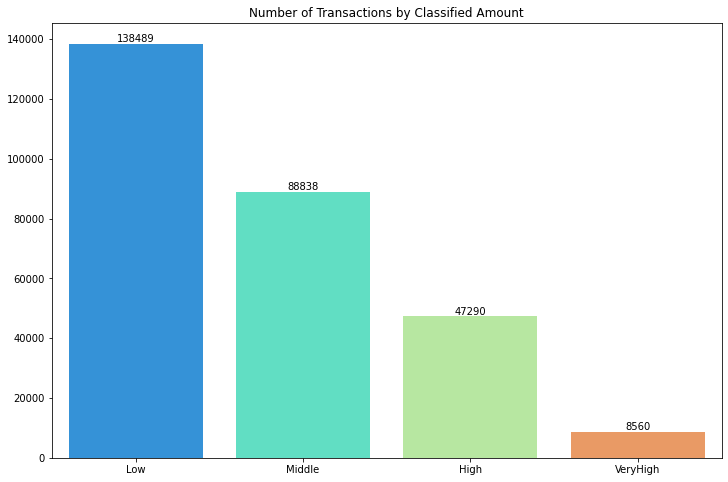

In [ ]:
for i in df.groupby("Amount_Class")["Class"].count().index:
    print("Total number of transactions in ", i.upper(),":", df.groupby("Amount_Class")["Class"].count().loc[i])

plt.figure(figsize=(12,8))
plt.title("Number of Transactions by Classified Amount")
ax = sns.barplot(x=df["Amount_Class"].value_counts().index, y=df["Amount_Class"].value_counts().values, palette="rainbow")
ax.bar_label(ax.containers[0])
plt.show()

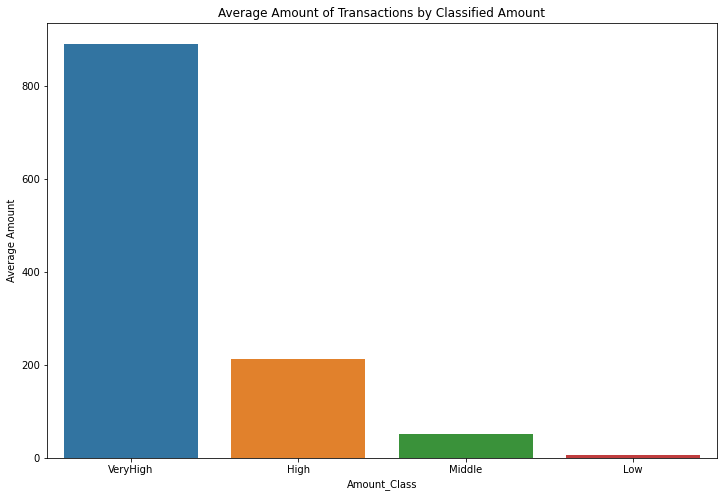

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Average Amount of Transactions by Classified Amount")
ax = sns.barplot(x="Amount_Class", y="Average Amount", data=df.groupby("Amount_Class")["Amount"].mean().to_frame(name = 'Average Amount').reset_index(),
                 order=["VeryHigh", "High", "Middle", "Low"])

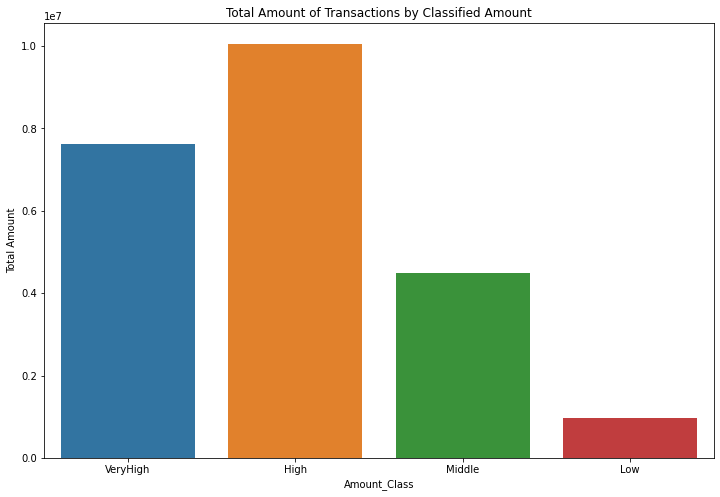

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Total Amount of Transactions by Classified Amount")
ax = sns.barplot(x="Amount_Class", y="Total Amount", data=df.groupby("Amount_Class")["Amount"].sum().to_frame(name = 'Total Amount').reset_index(),
                 order=["VeryHigh", "High", "Middle", "Low"])

In [ ]:
df_fraud = df[df['Class'] == 1] # refreshing the df_fraud

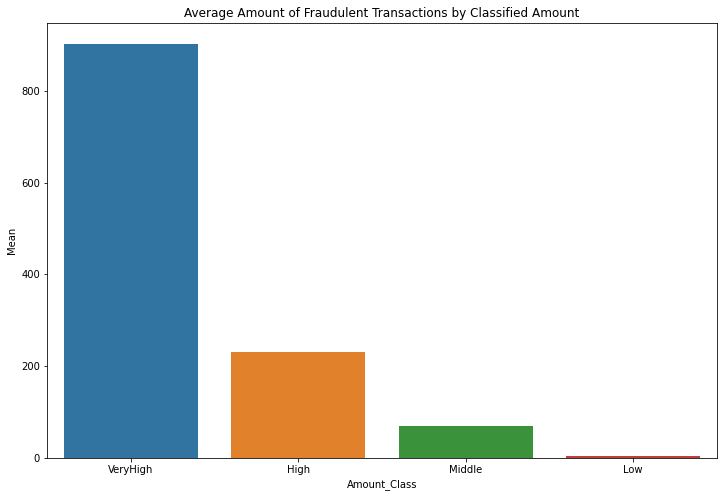

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Average Amount of Fraudulent Transactions by Classified Amount")
ax = sns.barplot(x="Amount_Class", y="Mean", data=df_fraud.groupby("Amount_Class")["Amount"].mean().to_frame(name = 'Mean').reset_index(),
                 order=["VeryHigh", "High", "Middle", "Low"])

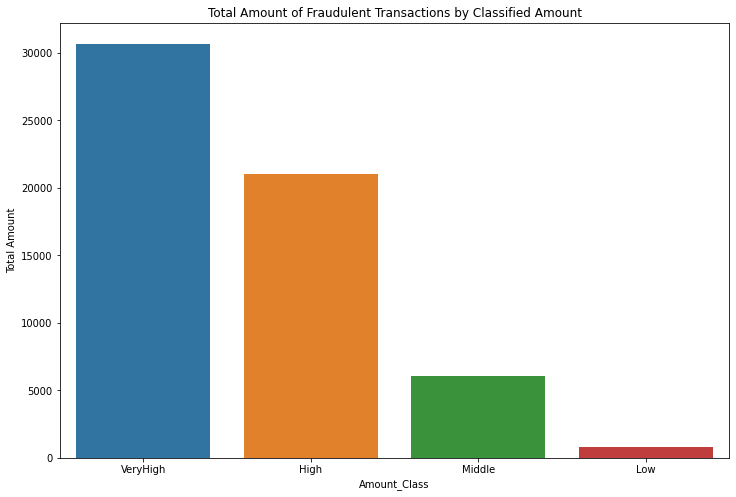

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Total Amount of Fraudulent Transactions by Classified Amount")
ax = sns.barplot(x="Amount_Class", y="Total Amount", data=df_fraud.groupby("Amount_Class")["Amount"].sum().to_frame(name = 'Total Amount').reset_index(),
                 order=["VeryHigh", "High", "Middle", "Low"])

**I can say that portion of very high amount of fradulent transactions is higher than portion of very high class in the normal transactions. 90 percent of amount of fraudelent transactions are consist of high and very high amounts. However number of these transactions are around 120 in total. **

In [ ]:
df.sample()

,Amount,Amount_Class,Hour_Class,Day,V1,V2,V3,V4,V5,V6,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
272085,130.61,High,Afternoon,Day2,-1.242002,2.182251,-3.298287,-0.384039,0.606816,-0.357087,...,-0.727724,2.714342,1.033683,0.093098,0.343514,-0.870513,-0.415083,0.444728,0.01014,0


In [ ]:
df.drop(columns="Day", axis=1, inplace=True)

In [ ]:
df.Amount_Class = df.Amount_Class.map({"Low":0, "Middle" : 1, "High" : 2, "VeryHigh": 3}) # converting from categorical to ordinal 


In [ ]:
df.sample()

,Amount,Amount_Class,Hour_Class,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
225863,1.98,0,Morning,2.077489,0.157339,-1.770385,0.369809,0.54305,-0.697474,0.179796,...,-0.145048,-0.367429,-0.937021,0.323782,0.324262,-0.245192,0.186408,-0.05862,-0.032268,0


In [ ]:
df_imp.sample

<bound method NDFrame.sample of         Amount  Hour        V1        V2        V4        V6        V8  \
282679   15.09    23  1.804109  0.190894  3.666770  1.058732  0.349826   
58884   590.84    13  0.079682 -1.680813  1.479933  0.628367 -0.010513   
179529   61.74    10  2.004599 -1.220997 -0.369878 -0.687817 -0.049062   
279447    2.69    22 -0.091920  1.272585 -0.620233 -0.735574 -0.137214   
273585   90.00    22  1.836088 -0.706391  0.316438 -0.272591  0.067706   
...        ...   ...       ...       ...       ...       ...       ...   
81698   591.12    16  0.044825 -1.532107  1.619995 -0.467983 -0.279701   
7667      4.99     2 -0.636393  0.820481  1.091706  0.350480 -0.046477   
223857   45.00    15  1.863110 -0.366371  1.266312  0.277019  0.166159   
222602    7.70    15 -1.829690  2.050740 -1.484203 -1.404055  0.254452   
73150   104.78    15  1.085367 -1.200524 -0.705968  0.292542  0.329864   

              V9       V10       V13  ...       V20       V21       V22  \
2826

<AxesSubplot:>

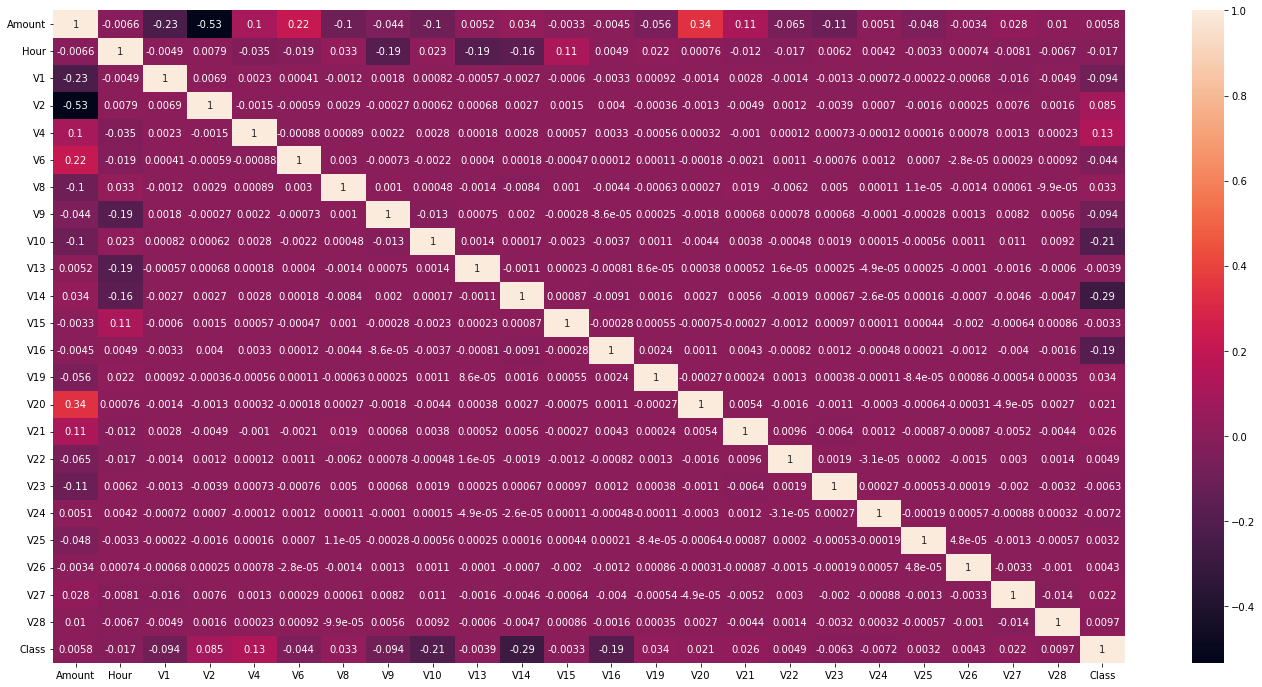

In [ ]:
plt.figure(figsize=(24,12))
sns.heatmap(df_imp.corr(), annot=True)

In [ ]:
df_imp = df[["Amount", "Hour_Class", "V1", "V2", "V4", "V6", "V8", "V9", "V10", "V13", "V14", "V15", "V16", "V19", "V20", "V21","V22", "V23","V24", "V25", "V26", "V27", "V28", "Class"]] # updating the df with selecting features.

In [ ]:
df_imp.sample()

,Amount,Hour_Class,V1,V2,V4,V6,V8,V9,V10,V13,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
4766,45.95,Afternoon,-0.102716,0.478136,0.805655,-1.064348,-0.243692,-0.426517,-0.262461,0.077537,...,0.004663,0.031106,0.031666,0.19039,-0.055885,-0.513643,-0.828485,0.124807,0.122492,0


In [ ]:
df.sample()

,Amount,Amount_Class,Hour_Class,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
220138,5.99,0,Evening,2.083484,-0.103121,-1.464651,0.059243,0.454097,-0.291445,0.101445,...,-0.137831,-0.295973,-0.733245,0.191687,-1.022326,-0.176056,0.239478,-0.07322,-0.078587,0


In [ ]:
df3 = df.copy() # copy of df without dummy features

In [ ]:
df_imp2 = df_imp.copy() # copy of df_imp without dummy features

In [ ]:
df.drop(columns="Amount_Class", axis=1, inplace=True)

**I will continue with both complete df and the modified df which is consist of selected features.**

---
---


## 2. Data Preprocessing

#### Scaling

In [ ]:
#@title


In [ ]:
# Since most of our data has already been scaled we should scale the Amount column which is left to scale.
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Scaled_Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop('Amount', axis=1, inplace=True)

df_imp['Scaled_Amount'] = rob_scaler.fit_transform(df_imp['Amount'].values.reshape(-1,1))

df_imp.drop('Amount', axis=1, inplace=True)

In [ ]:
scaled_amount = df['Scaled_Amount']

df.drop(['Scaled_Amount'], axis=1, inplace=True)
df.insert(0, 'Scaled_Amount', scaled_amount)

df_imp.drop(['Scaled_Amount'], axis=1, inplace=True)
df_imp.insert(0, 'Scaled_Amount', scaled_amount)
# Amount is scaled!

#df.head()

In [ ]:
df.Scaled_Amount.max(), df.Scaled_Amount.min(), df.Scaled_Amount.mean()

(30.988920056100987, -0.3084151472650771, 0.8376577060042456)

In [ ]:
df_imp.Scaled_Amount.max(), df_imp.Scaled_Amount.min(), df_imp.Scaled_Amount.mean()

(30.988920056100987, -0.3084151472650771, 0.8376577060042456)

In [ ]:
df_dummied = pd.get_dummies(df)

In [ ]:
df_dummied.sample()

,Scaled_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Class,Hour_Class_Afternoon,Hour_Class_Evening,Hour_Class_Morning,Hour_Class_Night
124643,-0.002665,1.070299,-0.318,1.220064,0.712446,-0.884834,0.483958,-0.804489,0.368199,0.703976,...,0.047577,0.138267,0.328842,0.025576,0.015303,0,0,0,1,0


In [ ]:
df_imp_dummied = pd.get_dummies(df_imp)

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [ ]:
X=df_dummied.drop(["Class"], axis=1)
y=df_dummied["Class"]

In [ ]:
X.shape, y.shape

((283177, 33), (283177,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:
X2=df_imp_dummied.drop(["Class"], axis=1)
y2=df_imp_dummied["Class"]

In [ ]:
X2.shape, y2.shape

((283177, 26), (283177,))

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, stratify=y, random_state=42)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [ ]:
from sklearn.linear_model import LogisticRegression

## With df (Complete dataframe)

***ii. Model Training***

In [ ]:
log_model=LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101)

In [ ]:
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [ ]:
y_pred=log_model.predict(X_test)

In [ ]:
y_pred_proba = log_model.predict_proba(X_test)

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(5)

,Scaled_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Hour_Class_Afternoon,Hour_Class_Evening,Hour_Class_Morning,Hour_Class_Night,Class,pred,pred_proba
171361,-0.027910,-0.785801,-0.345018,1.336145,-0.528522,1.628071,0.579050,-0.133713,0.116111,-0.447128,...,1.113748,-0.143742,-0.129330,0,1,0,0,0,0,0.012676
4129,-0.283310,2.320998,-0.496412,-2.593376,-0.962050,0.323330,-1.454052,0.329897,-0.520266,-0.860366,...,0.278194,-0.104142,-0.091720,1,0,0,0,0,0,0.045240
33322,-0.297616,1.184662,-0.216035,0.651774,-0.168070,-0.769154,-0.379905,-0.482859,0.188342,0.333287,...,0.908928,-0.066832,-0.005374,1,0,0,0,0,0,0.022944
137686,0.291445,-0.494550,0.931252,0.444943,3.058624,1.476150,0.646998,0.951633,0.001250,-1.297045,...,0.102679,0.106537,0.210144,0,0,1,0,0,0,0.230698
184315,1.068583,-0.931248,-0.960762,0.626824,-0.829301,0.499025,-1.623618,0.295792,-0.208445,-1.019041,...,-0.242765,0.131692,0.213148,1,0,0,0,0,0,0.108686


***iii. Prediction and Model Evaluating***

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[55056  1485]
 [    7    88]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56541
           1       0.06      0.93      0.11        95

    accuracy                           0.97     56636
   macro avg       0.53      0.95      0.55     56636
weighted avg       1.00      0.97      0.99     56636


Train_Set
[[220165   5998]
 [    28    350]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    226163
           1       0.06      0.93      0.10       378

    accuracy                           0.97    226541
   macro avg       0.53      0.95      0.55    226541
weighted avg       1.00      0.97      0.99    226541



In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 5)
df_scores_log = pd.DataFrame(scores, index = range(1, 6))
df_scores_log

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,9.422808,0.123420,0.052592,0.921053,0.099502,0.972036
2,8.515396,0.095519,0.050593,0.853333,0.095522,0.973250
3,10.034220,0.091716,0.050613,0.880000,0.095722,0.972477
4,5.180096,0.089899,0.056604,0.868421,0.106280,0.975501
5,5.418987,0.091221,0.050505,0.986842,0.096092,0.968858


In [ ]:
df_scores_log.mean()[2:]

test_precision    0.052181
test_recall       0.901930
test_f1           0.098624
test_accuracy     0.972424
dtype: float64

Cross Validate for 0 class

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101)

scores = cross_validate(model, X_train, y_train,scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}, 
                        cv = 5)
df_scores_log_c0 = pd.DataFrame(scores, index = range(1, 6))
df_scores_log_c0

,fit_time,score_time,test_precision_0,test_recall_0,test_f1_0
1,9.129656,0.153764,0.999864,0.972122,0.985798
2,8.408945,0.102793,0.999750,0.973449,0.986424
3,9.756056,0.087077,0.999795,0.972631,0.986026
4,5.097620,0.087466,0.999773,0.975681,0.987580
5,5.356267,0.090017,0.999977,0.968827,0.984156


In [ ]:
df_scores_log_c0.mean()[2:]

test_precision_0    0.999832
test_recall_0       0.972542
test_f1_0           0.985997
dtype: float64

Cross Validate for 1 class

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_1 = make_scorer(f1_score, pos_label =1)
precision_1 = make_scorer(precision_score, pos_label =1)
recall_1 = make_scorer(recall_score, pos_label =1)

In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101)

scores = cross_validate(model, X_train, y_train,scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}, 
                        cv = 5)
df_scores_log_c1 = pd.DataFrame(scores, index = range(1, 6))
df_scores_log_c1

,fit_time,score_time,test_precision_1,test_recall_1,test_f1_1
1,10.039509,0.134777,0.052592,0.921053,0.099502
2,12.360456,0.090966,0.050593,0.853333,0.095522
3,9.927237,0.088011,0.050613,0.880000,0.095722
4,5.077925,0.085315,0.056604,0.868421,0.106280
5,5.388795,0.088094,0.050505,0.986842,0.096092


In [ ]:
df_scores_log_c1.mean()[2:]

test_precision_1    0.052181
test_recall_1       0.901930
test_f1_1           0.098624
dtype: float64

# GridSearchCV

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
recall_1 = make_scorer(recall_score, pos_label =1)
penalty = ["l1", "l2"]
C = [0.5, 1]
class_weight= ["balanced"] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = [ "sag", "saga"]  #For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones.

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,   
                          param_grid=param_grid,
                          cv=3,
                          scoring = recall_1,  # f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 1], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['sag', 'saga']},
             scoring=make_scorer(recall_score, pos_label=1))

In [ ]:
grid_model.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[54472  2069]
 [    7    88]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56541
           1       0.04      0.93      0.08        95

    accuracy                           0.96     56636
   macro avg       0.52      0.94      0.53     56636
weighted avg       1.00      0.96      0.98     56636


Train_Set
[[217459   8704]
 [    26    352]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    226163
           1       0.04      0.93      0.07       378

    accuracy                           0.96    226541
   macro avg       0.52      0.95      0.53    226541
weighted avg       1.00      0.96      0.98    226541



In [ ]:
model = LogisticRegression(C=1, penalty= 'l2', solver= 'saga', class_weight='balanced',max_iter=1000,random_state=101)

#scores = cross_validate(model, X_train, y_train,scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}, cv = 3)
df_scores_grid = pd.DataFrame(scores, index = range(1, 4))
df_scores_grid

In [ ]:
df_scores_grid.mean()[2:]

In [ ]:
y_pred=grid_model.predict(X_test)

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(5)

,Amount_Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Hour_Class_Afternoon,Hour_Class_Evening,Hour_Class_Morning,Hour_Class_Night,Class,pred,pred_proba
147718,0,1.286974,0.068900,-1.122706,-0.064997,2.150239,3.367245,-0.469668,0.810997,-0.079931,...,-0.423486,0.024753,0.019008,0,0,1,0,0,0,0.001059
199796,0,-0.196957,-0.320067,-0.181783,0.157138,1.412549,1.012058,-0.075926,0.275461,-2.038912,...,1.130377,0.175938,0.142013,1,0,0,0,0,0,0.040830
156198,0,1.896762,0.246170,-0.789960,3.684382,0.227494,0.144506,-0.126317,0.167708,-0.637171,...,0.253640,-0.057691,-0.071153,1,0,0,0,0,0,0.392105
77975,0,-0.974828,1.292751,1.454524,-0.098708,-0.111293,-0.661486,0.614912,0.064454,-0.046705,...,0.090025,0.494428,0.257389,1,0,0,0,0,0,0.014845
90735,2,-0.820469,0.233826,0.930077,-1.154066,0.243445,-0.698636,1.259819,-0.001008,-0.770167,...,0.528666,-0.044797,0.116481,0,0,1,0,0,0,0.018257



You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

In [ ]:
plot_precision_recall_curve(grid_model, X_test, y_test);

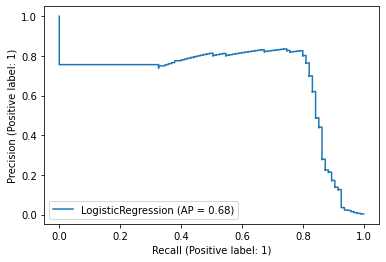

In [ ]:
plot_precision_recall_curve(log_model, X_test, y_test);


Finding Best Threshold

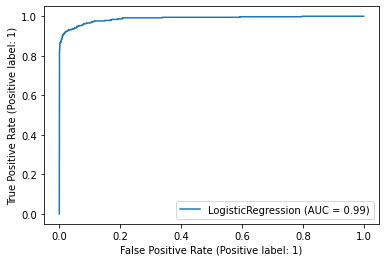

In [ ]:
plot_roc_curve(log_model, X_train, y_train);

In [ ]:
y_pred_proba = grid_model.predict_proba(X_train)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9825303515816552

In [ ]:
y_pred_proba = grid_model.predict_proba(X_train)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9825303515816552

In [ ]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1]) # amacımız max TP ve minimum FP değerlerini ve thresholdları tespit etmek. Bunun için de max TP rate ile min FT rate arasındaki farkın en yüksek olduğu değeri arıyoruz.

In [ ]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.39324966705417363

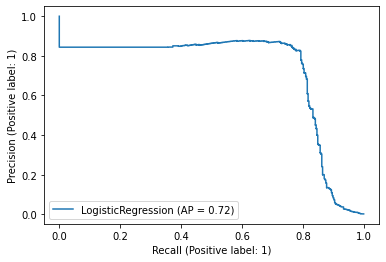

In [ ]:
plot_precision_recall_curve(grid_model, X_train, y_train);

In [ ]:
y_pred_proba = grid_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.7233245593526388

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [ ]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls)) # max f1 skorunu tespit etmek istiyoruz.
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.9999742344658136

In [ ]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [ ]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[56528    13]
 [   20    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56541
           1       0.85      0.79      0.82        95

    accuracy                           1.00     56636
   macro avg       0.93      0.89      0.91     56636
weighted avg       1.00      1.00      1.00     56636



In [ ]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[226101     62]
 [    79    299]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226163
           1       0.83      0.79      0.81       378

    accuracy                           1.00    226541
   macro avg       0.91      0.90      0.90    226541
weighted avg       1.00      1.00      1.00    226541



### Logistic Model with df_imp

In [ ]:
log_model2=LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101)

In [ ]:
log_model2.fit(X2_train, y2_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [ ]:
y2_pred=log_model2.predict(X2_test)

In [ ]:
y2_pred_proba = log_model2.predict_proba(X2_test)

In [ ]:
test_data2 = pd.concat([X2_test, y2_test], axis=1)
test_data2["pred"] = y2_pred
test_data2["pred_proba"] = y2_pred_proba[:,1]
test_data2.sample(5)

,Scaled_Amount,V1,V2,V4,V6,V8,V9,V10,V13,V14,...,V26,V27,V28,Hour_Class_Afternoon,Hour_Class_Evening,Hour_Class_Morning,Hour_Class_Night,Class,pred,pred_proba
70047,-0.065358,-1.061637,0.251074,-1.005380,0.316751,0.594484,0.526302,-0.923139,-0.328419,-0.406671,...,0.757122,-0.418166,-0.353119,1,0,0,0,0,0,0.013037
62912,3.450912,0.731414,-0.879361,0.384457,-0.836743,-0.171142,0.069353,-0.115318,-1.006316,0.598688,...,1.035119,-0.152835,0.028890,0,1,0,0,0,0,0.038843
102809,-0.125947,1.867552,1.052757,4.009937,-0.332487,0.030722,-1.195111,0.499492,-1.075181,-2.148333,...,-0.338993,-0.014764,0.003970,0,0,1,0,0,1,0.766406
32465,3.603506,1.527467,-1.468849,0.642346,0.693783,0.109997,-0.461443,0.922807,0.706141,-0.061183,...,-1.117474,0.020843,0.016744,1,0,0,0,0,0,0.065700
39244,1.125806,-2.913732,1.956375,-2.242701,1.278265,-7.165817,0.136850,-3.244991,-0.919230,0.880624,...,0.789598,0.059643,0.118637,1,0,0,0,0,0,0.031431


In [ ]:
eval_metric(log_model2, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[54894  1647]
 [    7    88]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56541
           1       0.05      0.93      0.10        95

    accuracy                           0.97     56636
   macro avg       0.53      0.95      0.54     56636
weighted avg       1.00      0.97      0.98     56636


Train_Set
[[219530   6633]
 [    32    346]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    226163
           1       0.05      0.92      0.09       378

    accuracy                           0.97    226541
   macro avg       0.52      0.94      0.54    226541
weighted avg       1.00      0.97      0.98    226541



In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101)

scores2 = cross_validate(model, X2_train, y2_train, scoring = ['precision','recall','f1','accuracy'], cv = 5)
df_scores_log2 = pd.DataFrame(scores, index = range(1, 6))
df_scores_log2

,fit_time,score_time,test_precision_1,test_recall_1,test_f1_1
1,10.039509,0.134777,0.052592,0.921053,0.099502
2,12.360456,0.090966,0.050593,0.853333,0.095522
3,9.927237,0.088011,0.050613,0.880000,0.095722
4,5.077925,0.085315,0.056604,0.868421,0.106280
5,5.388795,0.088094,0.050505,0.986842,0.096092


In [ ]:
df_scores_log2.mean()[2:]

test_precision_1    0.052181
test_recall_1       0.901930
test_f1_1           0.098624
dtype: float64

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101)

scores = cross_validate(model, X2_train, y2_train,scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}, 
                        cv = 5)
df_scores_log_c02 = pd.DataFrame(scores, index = range(1, 6))
df_scores_log_c02

,fit_time,score_time,test_precision_0,test_recall_0,test_f1_0
1,6.155524,0.093745,0.999818,0.969889,0.984626
2,6.302607,0.166952,0.999795,0.969889,0.984615
3,4.299480,0.138867,0.999818,0.970442,0.984911
4,5.264011,0.138102,0.999750,0.972276,0.985822
5,5.520306,0.148750,0.999977,0.966152,0.982774


In [ ]:
df_scores_log_c02.mean()[2:]

test_precision_0    0.999831
test_recall_0       0.969730
test_f1_0           0.984549
dtype: float64

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_1 = make_scorer(f1_score, pos_label =1)
precision_1 = make_scorer(precision_score, pos_label =1)
recall_1 = make_scorer(recall_score, pos_label =1)

In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42)

scores = cross_validate(model, X2_train, y2_train,scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}, 
                        cv = 5)
df_scores_log_c12 = pd.DataFrame(scores, index = range(1, 6))
df_scores_log_c12

,fit_time,score_time,test_precision_1,test_recall_1,test_f1_1
1,6.318525,0.152360,0.047552,0.894737,0.090305
2,5.949033,0.084617,0.046218,0.880000,0.087824
3,4.586181,0.084434,0.047721,0.893333,0.090602
4,2.948647,0.083304,0.049280,0.855263,0.093190
5,3.165434,0.083168,0.046700,0.986842,0.089180


In [ ]:
df_scores_log_c12.mean()[2:]

test_precision_1    0.047494
test_recall_1       0.902035
test_f1_1           0.090220
dtype: float64

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = [0.5, 1]
class_weight= ["balanced"] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = [ "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model2 = GridSearchCV(estimator=model,   
                          param_grid=param_grid,
                          cv=3,
                          scoring = recall_1,
                          n_jobs = -1)

In [ ]:
grid_model2.fit(X2_train,y2_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 1], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['sag', 'saga']},
             scoring=make_scorer(recall_score, pos_label=1))

In [ ]:
grid_model2.best_params_

{'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
eval_metric(grid_model2, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[52785  3756]
 [    7    88]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     56541
           1       0.02      0.93      0.04        95

    accuracy                           0.93     56636
   macro avg       0.51      0.93      0.51     56636
weighted avg       1.00      0.93      0.96     56636


Train_Set
[[211312  14851]
 [    28    350]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97    226163
           1       0.02      0.93      0.04       378

    accuracy                           0.93    226541
   macro avg       0.51      0.93      0.51    226541
weighted avg       1.00      0.93      0.96    226541



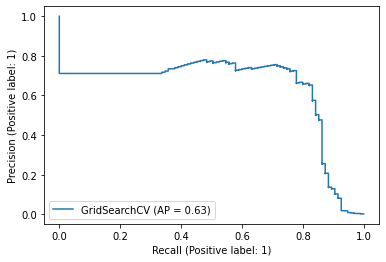

In [ ]:
plot_precision_recall_curve(grid_model2, X2_test, y2_test);

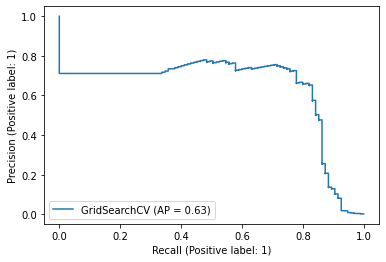

In [ ]:
plot_precision_recall_curve(grid_model2, X2_test, y2_test);

***v. Apply and Plot StratifiedKFold***

In [ ]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 101)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42)
CV(10, model, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.94%  std 0.01%
Precision-1   83.61%  std 3.73%
Recall-1      77.01%  std 6.26%
F1_score-1    79.97%  std 3.46%


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [ ]:
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline   # Smote' un kendi kutuphanesindeki pipeline.

In [ ]:
over = SMOTE(sampling_strategy={1: 5000})
under = RandomUnderSampler(sampling_strategy={0: 15000})

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [ ]:
y_resampled_over.value_counts()

0    226163
1      5000
Name: Class, dtype: int64

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [ ]:
y_resampled_under.value_counts()

0    15000
1      378
Name: Class, dtype: int64

In [ ]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

0    15000
1     5000
Name: Class, dtype: int64

In [ ]:
y_train.value_counts()

0    226163
1       378
Name: Class, dtype: int64

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [ ]:
#!pip install imblearn

In [ ]:
X=df_dummied.drop(["Class"], axis=1)
y=df_dummied["Class"]

In [ ]:
X.shape, y.shape

((283177, 33), (283177,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=101)

***ii. Model Training***

In [ ]:
operations = [('o', over), ('u', under), ("log_smote", LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101))]

In [ ]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [ ]:
smote_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 5000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 15000})),
                ('log_smote',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=101))])

In [ ]:
eval_metric(smote_pipeline_2, X_train, y_train, X_test, y_test)

Test_Set
[[55874   667]
 [    8    87]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56541
           1       0.12      0.92      0.20        95

    accuracy                           0.99     56636
   macro avg       0.56      0.95      0.60     56636
weighted avg       1.00      0.99      0.99     56636


Train_Set
[[223518   2645]
 [    44    334]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    226163
           1       0.11      0.88      0.20       378

    accuracy                           0.99    226541
   macro avg       0.56      0.94      0.60    226541
weighted avg       1.00      0.99      0.99    226541



In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_1    0.106124
test_recall_1       0.881123
test_f1_1           0.189207
dtype: float64

***iii. Prediction and Model Evaluating***

***iv.  Plot Precision and Recall Curve***


In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

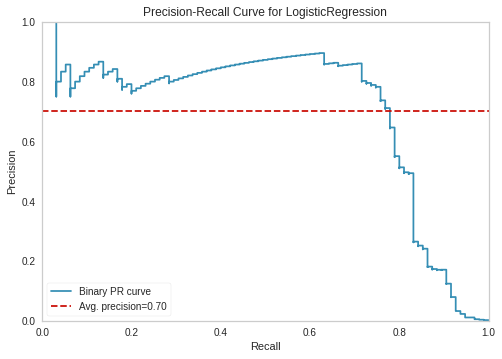

In [ ]:
operations = [('o', over), ('u', under), ("log_smote", LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101))]
smote_pipeline = imbpipeline(steps=operations)

viz = PrecisionRecallCurve(
    smote_pipeline,
    per_class=True, classes= [0,1],
    cmap="Set1",
    )
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

### SMOTE with df_imp

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline   # Smote' un kendi kutuphanesindeki pipeline.

In [ ]:
over = SMOTE(sampling_strategy={1: 5000})
under = RandomUnderSampler(sampling_strategy={0: 15000})

In [ ]:
X2_resampled_over, y2_resampled_over = over.fit_resample(X2_train, y2_train)

In [ ]:
y2_resampled_over.value_counts()

0    226163
1      5000
Name: Class, dtype: int64

In [ ]:
X2_resampled_under, y2_resampled_under = under.fit_resample(X2_train, y2_train)

In [ ]:
y2_resampled_under.value_counts()

0    15000
1      378
Name: Class, dtype: int64

In [ ]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X2_resampled, y2_resampled = pipeline.fit_resample(X2_train, y2_train)

In [ ]:
y2_resampled.value_counts()

0    15000
1     5000
Name: Class, dtype: int64

In [ ]:
y2_train.value_counts()

0    226163
1       378
Name: Class, dtype: int64

In [ ]:
X=df_imp_dummied.drop(["Class"], axis=1)
y=df_imp_dummied["Class"]

In [ ]:
X2.shape, y2.shape

((283177, 26), (283177,))

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, stratify=y, random_state=101)

In [ ]:
operations = [('o', over), ('u', under), ("log_smote", LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101))]

In [ ]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [ ]:
smote_pipeline_2.fit(X2_train, y2_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 5000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 15000})),
                ('log_smote',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=101))])

In [ ]:
eval_metric(smote_pipeline_2, X2_train, y2_train, X2_test, y2_test)

Test_Set
[[55760   781]
 [   10    85]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56541
           1       0.10      0.89      0.18        95

    accuracy                           0.99     56636
   macro avg       0.55      0.94      0.58     56636
weighted avg       1.00      0.99      0.99     56636


Train_Set
[[223220   2943]
 [    42    336]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    226163
           1       0.10      0.89      0.18       378

    accuracy                           0.99    226541
   macro avg       0.55      0.94      0.59    226541
weighted avg       1.00      0.99      0.99    226541



In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X2_train, y2_train, scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_1    0.097364
test_recall_1       0.881123
test_f1_1           0.175274
dtype: float64

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

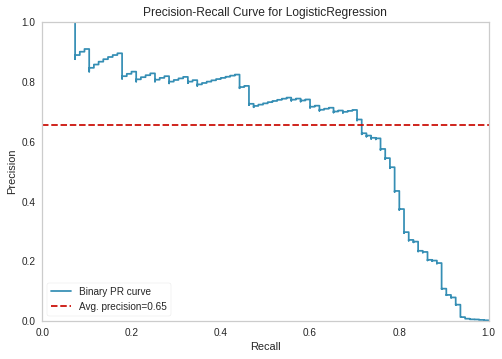

In [ ]:
operations = [('o', over), ('u', under), ("log_smote", LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101))]
smote_pipeline = imbpipeline(steps=operations)

viz = PrecisionRecallCurve(
    smote_pipeline,
    per_class=True, classes= [0,1],
    cmap="Set1",
    )
viz.fit(X2_train, y2_train)
viz.score(X2_test, y2_test)
viz.show();

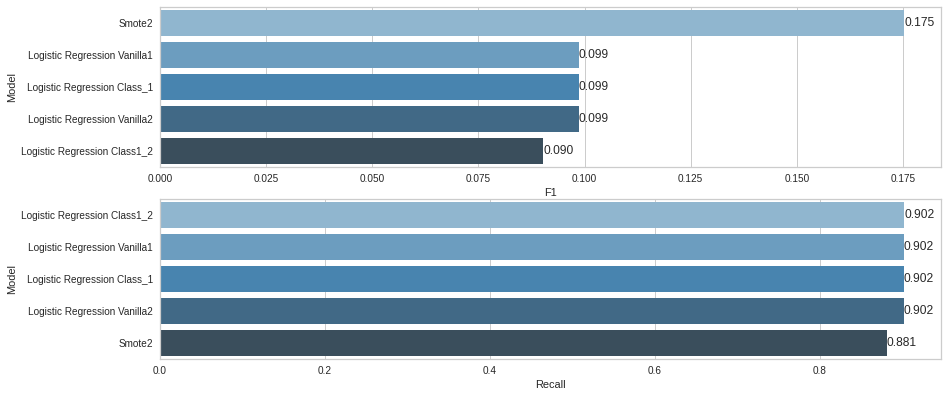

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression Vanilla1", "Logistic Regression Class_1", "Logistic Regression Vanilla2", "Logistic Regression Class1_2", "Smote2"],
                        "F1": [df_scores_log.mean()[4:5][0].item(), df_scores_log2.mean()[4:5][0].item(), df_scores_log_c1.mean()[4:5][0].item(), df_scores_log_c12.mean()[4:5].item(), df_scores.mean()[4:5][0].item() ],
                        "Recall": [df_scores_log.mean()[3:4][0].item(), df_scores_log.mean()[3:4][0].item(), df_scores_log_c1.mean()[3:4].item(), df_scores_log_c12.mean()[3:4].item(), df_scores.mean()[3:4][0].item()]})
                       # "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})    # Dengesiz datasetlerinde modelin genel performansi.

def labels(ax):
  for p in ax.patches:
    width = p.get_width()                        # get bar length
    ax.text(width,                               # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),             # set variable to display, 2 decimals
            ha = 'left',                         # horizontal alignment
            va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)



According to the scores above it is obvious that complete df and modified df has same recall scores. Therefore I decided to select modified df(df_imp) since it has less features.

***v. Apply and Plot StratifiedKFold***

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

Tree based modellerde dummies feature kullanilmaz; onun yerine OrdinalEncoder kullanilir :

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X3 = df.drop("Class",axis=1)          # Encoder icin yeni bir X degiskeni atadik.
y3 = df.Class                          # y' ye Encoder islemi uygulanmaz.

In [ ]:
cat = X3.select_dtypes("object").columns
cat                                        # OrdinalEncoder icin object feature' lari bir degiskene atadik.

Index(['Hour_Class'], dtype='object')

In [ ]:
enc = OrdinalEncoder()    # Ordinal Encoder' i tanimladik.

In [ ]:
X3[cat] = enc.fit_transform(X3[cat])    # Kategorik feature' larin icindeki butun unique degerleri sayisal degerlere cevirdi.
X3.head()

,Scaled_Amount,Hour_Class,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,2.622861,0.0,-1.271449,0.119183,2.663678,-0.376898,-1.099947,0.683283,0.612386,0.301021,...,-1.273995,0.544463,0.334883,0.889258,0.135969,0.142221,0.354853,0.569772,0.238929,0.146259
1,0.179663,3.0,1.209287,-0.216712,1.046179,0.363124,-0.847535,-0.164658,-0.708837,-0.069599,...,-0.086288,0.004331,-0.088628,0.119055,-0.109041,-0.066647,0.265408,1.096330,-0.064304,0.009736
2,0.740112,3.0,-1.305045,-0.518158,1.565712,-2.303222,0.924595,-1.003542,0.411821,-0.411193,...,-1.226225,-0.066986,0.044747,0.526807,-0.295717,-0.385066,0.056769,0.382244,-0.264703,-0.024034
3,-0.126227,3.0,2.018092,-0.371433,-0.501010,0.364246,-0.416186,-0.204561,-0.549407,-0.070981,...,0.019544,-0.137638,0.160426,0.761158,0.020707,-0.605446,0.023384,-0.175593,0.045962,-0.040859
4,0.729453,0.0,0.981314,-1.078303,1.327786,-0.425537,-1.140659,1.438294,-1.441432,0.573873,...,-2.945449,-0.438487,0.040248,0.670580,0.159421,-0.585728,-0.311201,0.804995,0.092946,0.034736


*Kategoric* olan feature' lar Encoder ile sayisal verilere donustukten sonra yukaridaki modeller ile karismasin diye yeni degiskenler ile train ve test datalari olusturduk :

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101, stratify =y)

In [ ]:
print("Train features shape : ", X3_train.shape)
print("Train target shape   : ", y3_train.shape)
print("Test features shape  : ", X3_test.shape)
print("Test target shape    : ", y3_test.shape)

Train features shape :  (226541, 30)
Train target shape   :  (226541,)
Test features shape  :  (56636, 30)
Test target shape    :  (56636,)


### Vanilla RF Model

__class_weight="balanced"__ bastan belirledik conku datamiz unbalance durumda. 

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [ ]:
rf_model.fit(X3_train, y3_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [ ]:
eval_metric(rf_model, X3_train, y3_train, X3_test, y3_test)

Test_Set
[[56538     3]
 [   30    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56541
           1       0.96      0.68      0.80        95

    accuracy                           1.00     56636
   macro avg       0.98      0.84      0.90     56636
weighted avg       1.00      1.00      1.00     56636


Train_Set
[[226163      0]
 [     0    378]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226163
           1       1.00      1.00      1.00       378

    accuracy                           1.00    226541
   macro avg       1.00      1.00      1.00    226541
weighted avg       1.00      1.00      1.00    226541



Balance yapmis olmamiza ragmen Fraud Class' inin test setine ait recall ve f1 skorlari düşük cikti. Train setindeki recall skoru %100 iken test setinde %80. Ayrıca model train setinde hiç hata yapmamışken test setinde 33 hata yapmış. Overfitting durumu var. Sonraki adimlarda hyperparametreler ile oynayarak skorlari iyilestirmeye calisacağım.

In [ ]:
f1_1 = make_scorer(f1_score, pos_label =1)
precision_1 = make_scorer(precision_score, pos_label =1)
recall_1 = make_scorer(recall_score, pos_label =1)

In [ ]:
scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}

Cross Validate islemi sonrasinda aldigimiz skorlarin tek seferlik skorlardan kısmne daha yüksek oldugunu goruyoruz :

In [ ]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X3_train, y3_train, scoring = scoring, cv = 3)
df_scores_rf = pd.DataFrame(scores, index = range(1,4))
df_scores_rf.mean()[2:]

test_precision_1    0.942803
test_recall_1       0.748677
test_f1_1           0.834341
dtype: float64

RF modelin GridSearch islemi cok uzun surdugu icin __min_samples_split':[18,20,22]__ deneyemedik ki asil overfitting' i engelleyecek kisim bu idi. Bu parametrenin default degeri 2 idi (yapragin bolunme sarti). Overfitting' i  azaltmak icin bolunme sartini artirmamiz gerekiyordu. (Deneyince de skorlar biraz iyilesecek ama %30' u gecemeyecek) :

In [ ]:
rf_model_tuned = RandomForestClassifier(n_estimators=400, max_depth=7, class_weight="balanced", random_state=101)

In [ ]:
rf_model_tuned.fit(X3_train, y3_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=400,
                       random_state=101)

### CV for Tuned RF Model

In [ ]:
model = RandomForestClassifier(n_estimators=400, max_depth=7, class_weight="balanced", random_state=101)

scores = cross_validate(model, X3_train, y3_train, scoring = scoring, cv = 3)
df_scores_rf_tuned = pd.DataFrame(scores, index = range(1,4))
df_scores_rf_tuned.mean()[2:]

test_precision_1    0.810053
test_recall_1       0.809524
test_f1_1           0.809153
dtype: float64

In [ ]:
df_scores_rf_tuned

,fit_time,score_time,test_precision_1,test_recall_1,test_f1_1
1,248.747144,7.266085,0.778689,0.753968,0.766129
2,232.461921,2.978294,0.801471,0.865079,0.832061
3,229.225849,2.185148,0.850000,0.809524,0.829268


In [ ]:
#param_grid = {'n_estimators':[400,500], 'max_depth':[10,15,20]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [ ]:
#rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
#rf_grid_model = GridSearchCV(rf_model,  param_grid, verbose=3,scoring=recall_1,n_jobs=-1)

***iii. Plot Precision and Recall Curve***


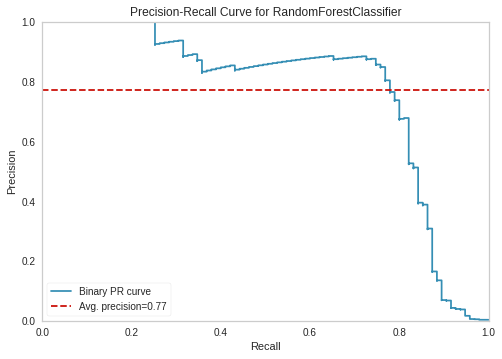

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
model = RandomForestClassifier(n_estimators=400, max_depth=7, class_weight="balanced", random_state=101)
viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [0,1],
    cmap="Set1"
)
viz.fit(X3_train, y3_train)
viz.score(X3_test, y3_test)
viz.show();

***ii. Prediction and Model Evaluating***

In [ ]:
y_pred = rf_model_tuned.predict(X3_test)

rf_tuned_AP = viz.score_
rf_tuned_f1 = f1_score(y3_test, y_pred, average=None)
rf_tuned_recall = recall_score(y3_test, y_pred, average=None)

In [ ]:
eval_metric(rf_model_tuned, X3_train, y3_train, X3_test, y3_test)

Test_Set
[[56511    30]
 [   19    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56541
           1       0.72      0.80      0.76        95

    accuracy                           1.00     56636
   macro avg       0.86      0.90      0.88     56636
weighted avg       1.00      1.00      1.00     56636


Train_Set
[[226068     95]
 [    30    348]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226163
           1       0.79      0.92      0.85       378

    accuracy                           1.00    226541
   macro avg       0.89      0.96      0.92    226541
weighted avg       1.00      1.00      1.00    226541



RF model works perfectly for Class 0. In class 1 recall score is satisfactory. But it is better to have similar precision score. 

***iv. Apply and Plot StratifiedKFold***

### Random Forest with df_imp

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X4 = df_imp.drop("Class",axis=1)          # Encoder icin yeni bir X degiskeni atadik.
y4 = df_imp.Class                          # y' ye Encoder islemi uygulanmaz.

In [ ]:
cat = X4.select_dtypes("object").columns
cat                                        # OrdinalEncoder icin object feature' lari bir degiskene atadik.

Index(['Hour_Class'], dtype='object')

In [ ]:
enc = OrdinalEncoder()    # Ordinal Encoder' i tanimladik.

In [ ]:
X4[cat] = enc.fit_transform(X4[cat])    # Kategorik feature' larin icindeki butun unique degerleri sayisal degerlere cevirdi.
X4.head()

,Scaled_Amount,Hour_Class,V1,V2,V4,V6,V8,V9,V10,V13,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,2.622861,0.0,-1.271449,0.119183,-0.376898,0.683283,0.301021,0.269563,-1.048041,1.021847,...,-1.273995,0.544463,0.334883,0.889258,0.135969,0.142221,0.354853,0.569772,0.238929,0.146259
1,0.179663,3.0,1.209287,-0.216712,0.363124,-0.164658,-0.069599,2.137913,-0.660969,2.440465,...,-0.086288,0.004331,-0.088628,0.119055,-0.109041,-0.066647,0.265408,1.096330,-0.064304,0.009736
2,0.740112,3.0,-1.305045,-0.518158,-2.303222,-1.003542,-0.411193,2.227980,-1.689676,2.654899,...,-1.226225,-0.066986,0.044747,0.526807,-0.295717,-0.385066,0.056769,0.382244,-0.264703,-0.024034
3,-0.126227,3.0,2.018092,-0.371433,0.364246,-0.204561,-0.070981,1.384995,-0.191301,1.104609,...,0.019544,-0.137638,0.160426,0.761158,0.020707,-0.605446,0.023384,-0.175593,0.045962,-0.040859
4,0.729453,0.0,0.981314,-1.078303,-0.425537,1.438294,0.573873,-0.344604,0.380333,1.011110,...,-2.945449,-0.438487,0.040248,0.670580,0.159421,-0.585728,-0.311201,0.804995,0.092946,0.034736


*Kategoric* olan feature' lar Encoder ile sayisal verilere donustukten sonra yukaridaki modeller ile karismasin diye yeni degiskenler ile train ve test datalari olusturduk :

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=101, stratify =y)

In [ ]:
print("Train features shape : ", X4_train.shape)
print("Train target shape   : ", y4_train.shape)
print("Test features shape  : ", X4_test.shape)
print("Test target shape    : ", y4_test.shape)

Train features shape :  (226541, 23)
Train target shape   :  (226541,)
Test features shape  :  (56636, 23)
Test target shape    :  (56636,)


### Vanilla RF Model

__class_weight="balanced"__ bastan belirledik conku datamiz unbalance durumda. 

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [ ]:
rf_model.fit(X4_train, y4_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [ ]:
eval_metric(rf_model, X4_train, y4_train, X4_test, y4_test)

Test_Set
[[56538     3]
 [   32    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56541
           1       0.95      0.66      0.78        95

    accuracy                           1.00     56636
   macro avg       0.98      0.83      0.89     56636
weighted avg       1.00      1.00      1.00     56636


Train_Set
[[226163      0]
 [     0    378]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226163
           1       1.00      1.00      1.00       378

    accuracy                           1.00    226541
   macro avg       1.00      1.00      1.00    226541
weighted avg       1.00      1.00      1.00    226541



Balance yapmis olmamiza ragmen Fraud Class' inin test setine ait recall ve f1 skorlari düşük cikti. Train setindeki recall skoru %100 iken test setinde %69. Overfitting durumu var. Sonraki adimlarda hyperparametreler ile oynayarak skorlari iyilestirmeye calisacagiz.

In [ ]:
f1_1 = make_scorer(f1_score, pos_label =1)
precision_1 = make_scorer(precision_score, pos_label =1)
recall_1 = make_scorer(recall_score, pos_label =1)

In [ ]:
scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}

Cross Validate islemi sonrasinda aldigimiz skorlarin tek seferlik skorlarla paralel olduğu söylenebilir.

In [ ]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X4_train, y4_train, scoring = scoring, cv = 3)
df_imp_scores_rf = pd.DataFrame(scores, index = range(1, 4))
df_imp_scores_rf.mean()[2:]

test_precision_1    0.946837
test_recall_1       0.708995
test_f1_1           0.810377
dtype: float64

RF modelin GridSearch islemi cok uzun surdugu icin __min_samples_split':[18,20,22]__ deneyemedik ki asil overfitting' i engelleyecek kisim bu idi. Bu parametrenin default degeri 2 idi (yapragin bolunme sarti). Overfitting' i  azaltmak icin bolunme sartini artirmamiz gerekiyordu. (Deneyince de skorlar biraz iyilesecek ama %30' u gecemeyecek) :

In [ ]:
rf_model_tuned = RandomForestClassifier(n_estimators=400, max_depth=7, class_weight="balanced", random_state=101)

In [ ]:
rf_model_tuned.fit(X4_train, y4_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=400,
                       random_state=101)

In [ ]:
model = RandomForestClassifier(n_estimators=400, max_depth=7, class_weight="balanced", random_state=101)

scores = cross_validate(model, X4_train, y4_train, scoring = scoring, cv = 3)
df_imp_scores_rf_tuned = pd.DataFrame(scores, index = range(1, 4))
df_imp_scores_rf_tuned.mean()[2:]

test_precision_1    0.799201
test_recall_1       0.798942
test_f1_1           0.798677
dtype: float64

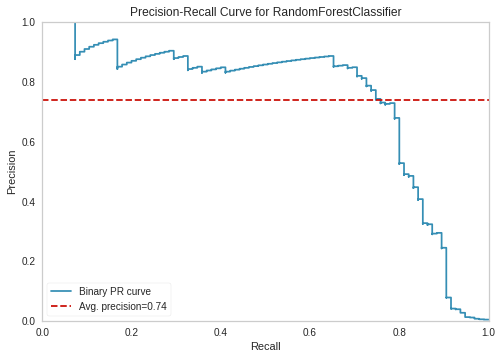

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
model = RandomForestClassifier(n_estimators=400, max_depth=7, class_weight="balanced", random_state=101)
viz = PrecisionRecallCurve(
    model,
    per_class=True,classes= [0,1], 
    cmap="Set1"
)
viz.fit(X4_train, y4_train)
viz.score(X4_test, y4_test)
viz.show();

In [ ]:
y_pred = rf_model_tuned.predict(X4_test)

rf_AP2 = viz.score_
rf_f12 = f1_score(y4_test, y_pred, average=None)
rf_recall2 = recall_score(y4_test, y_pred, average=None)

In [ ]:
eval_metric(rf_model_tuned, X4_train, y4_train, X4_test, y4_test)

Test_Set
[[56508    33]
 [   20    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56541
           1       0.69      0.79      0.74        95

    accuracy                           1.00     56636
   macro avg       0.85      0.89      0.87     56636
weighted avg       1.00      1.00      1.00     56636


Train_Set
[[226051    112]
 [    26    352]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226163
           1       0.76      0.93      0.84       378

    accuracy                           1.00    226541
   macro avg       0.88      0.97      0.92    226541
weighted avg       1.00      1.00      1.00    226541



With Smote

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline   # Smote' un kendi kutuphanesindeki pipeline.

In [ ]:
over = SMOTE(sampling_strategy={1: 10000})
under = RandomUnderSampler(sampling_strategy={0: 30000})

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X3_train, y3_train)

In [ ]:
y_resampled_over.value_counts()

0    226163
1     10000
Name: Class, dtype: int64

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X3_train, y3_train)

In [ ]:
y_resampled_under.value_counts()

0    30000
1      378
Name: Class, dtype: int64

In [ ]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X3_train, y3_train)

In [ ]:
y_resampled.value_counts()

0    30000
1    10000
Name: Class, dtype: int64

In [ ]:
y3_train.value_counts()

0    226163
1       378
Name: Class, dtype: int64

In [ ]:
X3=df.drop(["Class"], axis=1)
y3=df["Class"]

In [ ]:
X3.shape, y3.shape

((283177, 30), (283177,))

In [ ]:
cat = X3.select_dtypes("object").columns
cat                                        # OrdinalEncoder icin object feature' lari bir degiskene atadik.

Index(['Hour_Class'], dtype='object')

In [ ]:
enc = OrdinalEncoder()    # Ordinal Encoder' i tanimladik.

In [ ]:
X3[cat] = enc.fit_transform(X3[cat])    # Kategorik feature' larin icindeki butun unique degerleri sayisal degerlere cevirdi.
X3.head()

,Scaled_Amount,Hour_Class,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,2.622861,0.0,-1.271449,0.119183,2.663678,-0.376898,-1.099947,0.683283,0.612386,0.301021,...,-1.273995,0.544463,0.334883,0.889258,0.135969,0.142221,0.354853,0.569772,0.238929,0.146259
1,0.179663,3.0,1.209287,-0.216712,1.046179,0.363124,-0.847535,-0.164658,-0.708837,-0.069599,...,-0.086288,0.004331,-0.088628,0.119055,-0.109041,-0.066647,0.265408,1.096330,-0.064304,0.009736
2,0.740112,3.0,-1.305045,-0.518158,1.565712,-2.303222,0.924595,-1.003542,0.411821,-0.411193,...,-1.226225,-0.066986,0.044747,0.526807,-0.295717,-0.385066,0.056769,0.382244,-0.264703,-0.024034
3,-0.126227,3.0,2.018092,-0.371433,-0.501010,0.364246,-0.416186,-0.204561,-0.549407,-0.070981,...,0.019544,-0.137638,0.160426,0.761158,0.020707,-0.605446,0.023384,-0.175593,0.045962,-0.040859
4,0.729453,0.0,0.981314,-1.078303,1.327786,-0.425537,-1.140659,1.438294,-1.441432,0.573873,...,-2.945449,-0.438487,0.040248,0.670580,0.159421,-0.585728,-0.311201,0.804995,0.092946,0.034736


In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, stratify=y, random_state=101)

In [ ]:
operations = [('o', over), ('u', under), ("rf_smote", RandomForestClassifier(n_estimators=400, max_depth=7, class_weight="balanced", random_state=101))]

In [ ]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [ ]:
smote_pipeline_2.fit(X3_train, y3_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 10000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 30000})),
                ('rf_smote',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        n_estimators=400, random_state=101))])

In [ ]:
eval_metric(smote_pipeline_2, X3_train, y3_train, X3_test, y3_test)

Test_Set
[[56404   137]
 [   14    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56541
           1       0.37      0.85      0.52        95

    accuracy                           1.00     56636
   macro avg       0.69      0.93      0.76     56636
weighted avg       1.00      1.00      1.00     56636


Train_Set
[[225654    509]
 [    19    359]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226163
           1       0.41      0.95      0.58       378

    accuracy                           1.00    226541
   macro avg       0.71      0.97      0.79    226541
weighted avg       1.00      1.00      1.00    226541



In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X3_train, y3_train, scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}, cv = 3)
df_rf_smote_scores = pd.DataFrame(scores, index = range(1, 4))
df_rf_smote_scores.mean()[2:]

test_precision_1    0.432346
test_recall_1       0.854497
test_f1_1           0.566634
dtype: float64

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

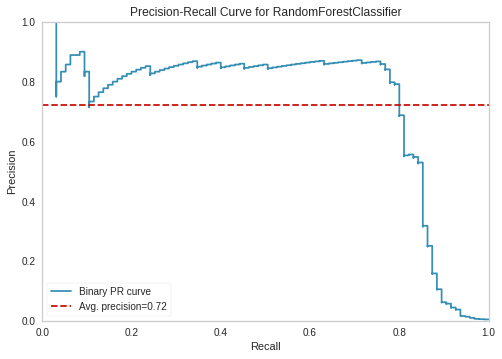

In [ ]:
operations = [('o', over), ('u', under), ("rf_smote", RandomForestClassifier(n_estimators=400, max_depth=7, class_weight="balanced", random_state=101))]
smote_pipeline = imbpipeline(steps=operations)

viz = PrecisionRecallCurve(
    smote_pipeline,
    per_class=True, classes= [0,1],
    cmap="Set1",
    )
viz.fit(X3_train, y3_train)
viz.score(X3_test, y3_test)
viz.show();

# Smote with df_2

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline   # Smote' un kendi kutuphanesindeki pipeline.

In [ ]:
over = SMOTE(sampling_strategy={1: 10000})
under = RandomUnderSampler(sampling_strategy={0: 30000})

In [ ]:
X2_resampled_over, y2_resampled_over = over.fit_resample(X4_train, y4_train)

In [ ]:
y2_resampled_over.value_counts()

0    226163
1     10000
Name: Class, dtype: int64

In [ ]:
X2_resampled_under, y2_resampled_under = under.fit_resample(X4_train, y4_train)

In [ ]:
y2_resampled_under.value_counts()

0    30000
1      378
Name: Class, dtype: int64

In [ ]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X2_resampled, y2_resampled = pipeline.fit_resample(X4_train, y4_train)

In [ ]:
y2_resampled.value_counts()

0    30000
1    10000
Name: Class, dtype: int64

In [ ]:
y4_train.value_counts()

0    226163
1       378
Name: Class, dtype: int64

In [ ]:
X4=df_imp.drop(["Class"], axis=1)
y4=df_imp["Class"]

In [ ]:
cat = X4.select_dtypes("object").columns
cat                                        # OrdinalEncoder icin object feature' lari bir degiskene atadik.

Index(['Hour_Class'], dtype='object')

In [ ]:
enc = OrdinalEncoder()    # Ordinal Encoder' i tanimladik.

In [ ]:
X4[cat] = enc.fit_transform(X4[cat])    # Kategorik feature' larin icindeki butun unique degerleri sayisal degerlere cevirdi.
X4.head()

,Scaled_Amount,Hour_Class,V1,V2,V4,V6,V8,V9,V10,V13,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,2.622861,0.0,-1.271449,0.119183,-0.376898,0.683283,0.301021,0.269563,-1.048041,1.021847,...,-1.273995,0.544463,0.334883,0.889258,0.135969,0.142221,0.354853,0.569772,0.238929,0.146259
1,0.179663,3.0,1.209287,-0.216712,0.363124,-0.164658,-0.069599,2.137913,-0.660969,2.440465,...,-0.086288,0.004331,-0.088628,0.119055,-0.109041,-0.066647,0.265408,1.096330,-0.064304,0.009736
2,0.740112,3.0,-1.305045,-0.518158,-2.303222,-1.003542,-0.411193,2.227980,-1.689676,2.654899,...,-1.226225,-0.066986,0.044747,0.526807,-0.295717,-0.385066,0.056769,0.382244,-0.264703,-0.024034
3,-0.126227,3.0,2.018092,-0.371433,0.364246,-0.204561,-0.070981,1.384995,-0.191301,1.104609,...,0.019544,-0.137638,0.160426,0.761158,0.020707,-0.605446,0.023384,-0.175593,0.045962,-0.040859
4,0.729453,0.0,0.981314,-1.078303,-0.425537,1.438294,0.573873,-0.344604,0.380333,1.011110,...,-2.945449,-0.438487,0.040248,0.670580,0.159421,-0.585728,-0.311201,0.804995,0.092946,0.034736


In [ ]:
X4.shape, y4.shape

((283177, 23), (283177,))

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, stratify=y, random_state=101)

In [ ]:
operations = [('o', over), ('u', under), ("rf_smote", RandomForestClassifier(n_estimators=400, max_depth=7, class_weight="balanced", random_state=101))]

In [ ]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [ ]:
smote_pipeline_2.fit(X4_train, y4_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 10000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 30000})),
                ('rf_smote',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        n_estimators=400, random_state=101))])

In [ ]:
eval_metric(smote_pipeline_2, X4_train, y4_train, X4_test, y4_test)

Test_Set
[[56392   149]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56541
           1       0.36      0.87      0.51        95

    accuracy                           1.00     56636
   macro avg       0.68      0.94      0.75     56636
weighted avg       1.00      1.00      1.00     56636


Train_Set
[[225660    503]
 [    21    357]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226163
           1       0.42      0.94      0.58       378

    accuracy                           1.00    226541
   macro avg       0.71      0.97      0.79    226541
weighted avg       1.00      1.00      1.00    226541



In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X4_train, y4_train, scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}, cv = 3)
df_imp_rf_smote_scores = pd.DataFrame(scores, index = range(1, 4))
df_imp_rf_smote_scores.mean()[2:]

test_precision_1    0.449175
test_recall_1       0.841270
test_f1_1           0.581511
dtype: float64

In [ ]:
df_imp_rf_smote_scores

,fit_time,score_time,test_precision_1,test_recall_1,test_f1_1
1,42.428828,2.529412,0.520202,0.817460,0.635802
2,42.709556,2.521347,0.360656,0.873016,0.510441
3,42.459255,2.545346,0.466667,0.833333,0.598291


In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

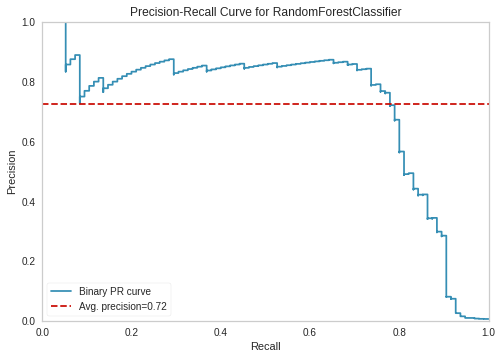

In [ ]:
operations = [('o', over), ('u', under), ("rf_smote",  RandomForestClassifier(n_estimators=400, max_depth=7, class_weight="balanced", random_state=101))]
smote_pipeline = imbpipeline(steps=operations)

viz = PrecisionRecallCurve(
    smote_pipeline,
    per_class=True, classes= [0,1],
    cmap="Set1",
    )
viz.fit(X4_train, y4_train)
viz.score(X4_test, y4_test)
viz.show();

In [ ]:
viz.score(X4_test, y4_test)

0.723744427180473

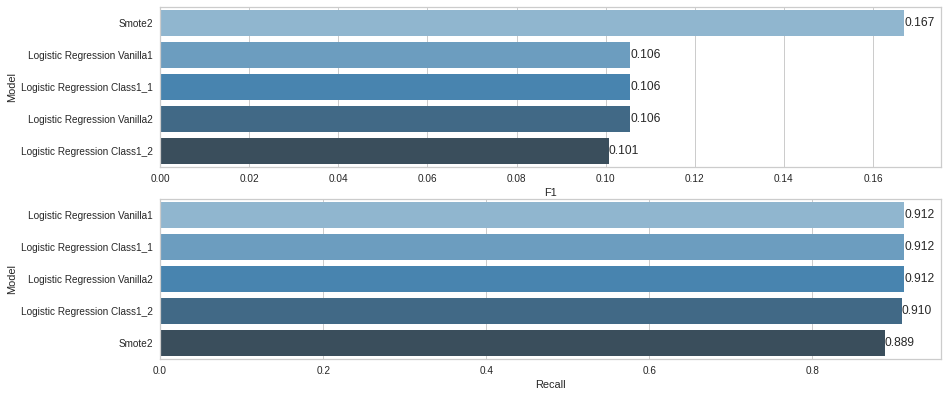

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression Vanilla1", "Logistic Regression Class_1", "Logistic Regression Vanilla2", "Logistic Regression Class1_2", "Smote2"],
                        "F1": [df_scores_log.mean()[4:5][0].item(), df_scores_log2.mean()[4:5][0].item(), df_scores_log_c1.mean()[4:5][0].item(), df_scores_log_c12.mean()[4:5].item(), df_scores.mean()[4:5][0].item() ],
                        "Recall": [df_scores_log.mean()[3:4][0].item(), df_scores_log.mean()[3:4][0].item(), df_scores_log_c1.mean()[3:4].item(), df_scores_log_c12.mean()[3:4].item(), df_scores.mean()[3:4][0].item()]})
                       # "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})    # Dengesiz datasetlerinde modelin genel performansi.

def labels(ax):
  for p in ax.patches:
    width = p.get_width()                        # get bar length
    ax.text(width,                               # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),             # set variable to display, 2 decimals
            ha = 'left',                         # horizontal alignment
            va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)



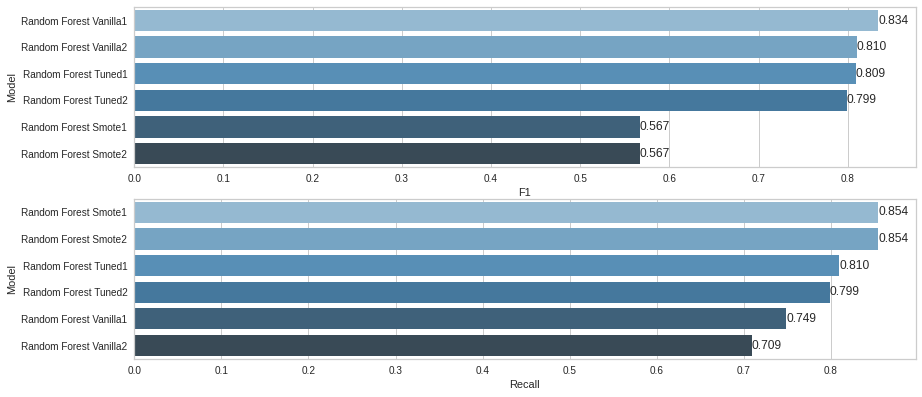

In [ ]:
compare = pd.DataFrame({"Model": ["Random Forest Vanilla1", "Random Forest Tuned1", "Random Forest Smote1", "Random Forest Vanilla2", "Random Forest Tuned2", "Random Forest Smote2",],
                        "F1": [df_scores_rf.mean()[4:5][0].item(), df_scores_rf_tuned.mean()[4:5][0].item(), df_rf_smote_scores.mean()[4:5][0].item(), df_imp_scores_rf.mean()[4:5][0].item(), df_imp_scores_rf_tuned.mean()[4:5][0].item(), df_rf_smote_scores.mean()[4:5][0].item()],
                        "Recall":  [df_scores_rf.mean()[3:4][0].item(), df_scores_rf_tuned.mean()[3:4][0].item(), df_rf_smote_scores.mean()[3:4][0].item(), df_imp_scores_rf.mean()[3:4][0].item(), df_imp_scores_rf_tuned.mean()[3:4][0].item(), df_rf_smote_scores.mean()[3:4][0].item()]})
                       # "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})    # Dengesiz datasetlerinde modelin genel performansi.

def labels(ax):
  for p in ax.patches:
    width = p.get_width()                        # get bar length
    ax.text(width,                               # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),             # set variable to display, 2 decimals
            ha = 'left',                         # horizontal alignment
            va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)

In the above score I used full dataframe(df) for models ending with 1 and modiifed(narrowed) dataframe for models ending with 2. In the below tables I use same df but different df_imp. The first difference is Amount feature is not classified in the above but classified in the belowed one. The other difference is I add some other features but still have less features than the original dataframe. 

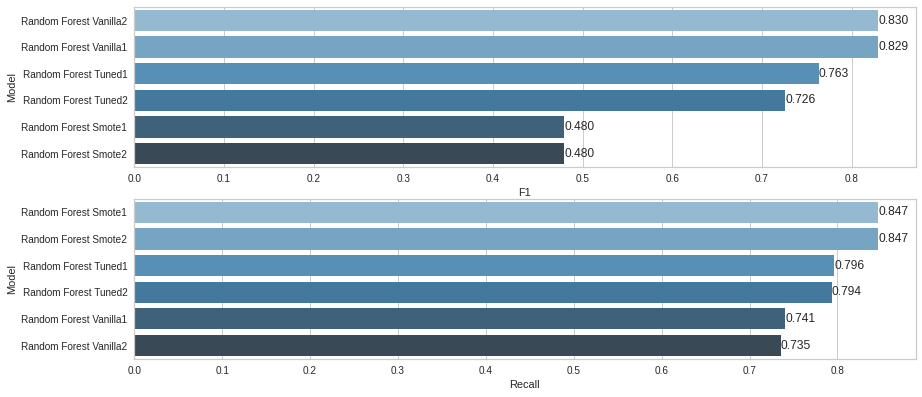

In [ ]:
#compare = pd.DataFrame({"Model": ["Random Forest Vanilla1", "Random Forest Tuned1", "Random Forest Smote1", "Random Forest Vanilla2", "Random Forest Tuned2", "Random Forest Smote2",],
                        "F1": [df_scores_rf.mean()[4:5][0].item(), df_scores_rf_tuned.mean()[4:5][0].item(), df_rf_smote_scores.mean()[4:5][0].item(), df_imp_scores_rf.mean()[4:5][0].item(), df_imp_scores_rf_tuned.mean()[4:5][0].item(), df_rf_smote_scores.mean()[4:5][0].item()],
                        "Recall":  [df_scores_rf.mean()[3:4][0].item(), df_scores_rf_tuned.mean()[3:4][0].item(), df_rf_smote_scores.mean()[3:4][0].item(), df_imp_scores_rf.mean()[3:4][0].item(), df_imp_scores_rf_tuned.mean()[3:4][0].item(), df_rf_smote_scores.mean()[3:4][0].item()]})
                       # "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})    # Dengesiz datasetlerinde modelin genel performansi.

def labels(ax):
  for p in ax.patches:
    width = p.get_width()                        # get bar length
    ax.text(width,                               # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),             # set variable to display, 2 decimals
            ha = 'left',                         # horizontal alignment
            va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)

According to the comparison tables it is obvious that random forest model's recall scores are improved by smoting. Vanilla RF models have better F1 score but in fraud detection projects recall scores has higher importance. Therefore I decideed to continue with smote RF model. On the other hand it is obvious that I got similar scores with the dataframe having fewer features. (df_imp) In conclusion Logistic models has best recall scores.(over 0.90) However F1 scores are very bad. (around 0.1). Therefore I prefer Random Forest Model with smoting. Moreover I will continue with the modified dataframe.(df_imp)   

In [ ]:
df.shape[1], df_imp.shape[1] # df_imp has 17 fewer features.

(31, 14)

In [ ]:
df_imp.head()

,Amount_Class,Hour_Class,V1,V2,V4,V6,V8,V9,V10,V13,V14,V15,V16,Class
0,1,Morning,1.300753,-0.592377,-0.594832,-1.148812,-0.174960,-1.165494,0.924235,-1.488416,0.835228,0.081748,-1.361472,0
1,2,Afternoon,1.834047,-1.948755,-1.567848,-0.837987,-0.337936,-1.964637,1.726618,0.114503,0.312088,-0.479675,-0.373087,0
2,0,Evening,-0.570620,0.290592,-0.473421,-1.280727,-0.250129,0.009784,-0.281694,0.519977,-0.035497,-0.394766,-0.059381,0
3,1,Afternoon,1.963609,-0.183782,0.193976,-1.464289,-0.396474,-0.096047,0.385509,-1.200576,1.152585,-0.305407,-0.116102,0
4,2,Evening,0.595232,-0.919561,1.808327,0.332217,0.155545,1.108914,-0.494962,0.472543,-0.713841,-0.796029,-0.907159,0


Hem over_sampling hem de under_sampling datada noise olusturur, ikisini de istemiyoruz. Smote icinde bir parametre olan __sampling_strategy__' i kullanarak hangi class' in ne kadar artirilmasi veya azaltilmasini istedigimizi belirtiyoruz. Biz burda 543 olan Hispanic sayisini 1200' e cikarmasini; White sayisini ise 2500' e dusurmesini istedik. Class' lardaki sayilari olabildigince dengeli bir sekilde birbirlerine yaklastirmaya calisiyoruz. Cok buyuk degisimler saglikli sonuc vermeyecektir. Deneme yanilma yolu ile datanin dogal yapisini bozmayacak sekilde ne kadar ekleme yapip cikarmamiz gerektigine karar verebiliriz. Cok hard bir sekilde veriyi artirma veya azaltma islemi hicbir zaman dogru sonuc vermez :

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam, SGD
from tensorflow.keras.layers import Dense, LSTM , Dropout
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

***ii. Define Model***

In [ ]:
X=df_imp_dummied.drop(["Class"], axis=1)
y=df_imp_dummied["Class"]

In [ ]:
X.shape, y.shape

((283177, 26), (283177,))

***iii. Compile Model***

***iv. Fit Model***

## Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
seed = 101

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=seed)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
tf.__version__

'2.8.0'

### Creating Model

### without class_weigth

In [ ]:
X_train.shape

(226541, 26)

In [ ]:
X_test.shape

(56636, 26)

In [ ]:
tf.random.set_seed(seed) 

model = Sequential()

model.add(Dense(26, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 5)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 132, epochs = 20, verbose =1, callbacks = [early_stop])

Epoch 1/20
1459/1459 [==============================] - 14s 6ms/step - loss: 0.0267 - recall: 0.3889 - val_loss: 0.0033 - val_recall: 0.7963
Epoch 2/20
1459/1459 [==============================] - 5s 4ms/step - loss: 0.0038 - recall: 0.7469 - val_loss: 0.0027 - val_recall: 0.7963
Epoch 3/20
1459/1459 [==============================] - 5s 4ms/step - loss: 0.0032 - recall: 0.7778 - val_loss: 0.0025 - val_recall: 0.7963
Epoch 4/20
1459/1459 [==============================] - 5s 4ms/step - loss: 0.0029 - recall: 0.7840 - val_loss: 0.0025 - val_recall: 0.8333
Epoch 5/20
1459/1459 [==============================] - 5s 4ms/step - loss: 0.0028 - recall: 0.7870 - val_loss: 0.0024 - val_recall: 0.7963
Epoch 6/20
1459/1459 [==============================] - 5s 4ms/step - loss: 0.0026 - recall: 0.8025 - val_loss: 0.0025 - val_recall: 0.8333
Epoch 7/20
1459/1459 [==============================] - 5s 4ms/step - loss: 0.0025 - recall: 0.8148 - val_loss: 0.0023 - val_recall: 0.8333
Epoch 8/20
1459/145

#### Evaluate

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 13)                351       
                                                                 
 dense_2 (Dense)             (None, 7)                 98        
                                                                 
 dense_3 (Dense)             (None, 4)                 32        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,188
Trainable params: 1,188
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


[<tf.Variable 'dense/kernel:0' shape=(26, 26) dtype=float32, numpy=
 array([[ 1.27256796e-01, -9.69756916e-02, -2.25347951e-01,
         -2.24941373e-01,  2.80792266e-02,  1.47071794e-01,
          2.86007255e-01,  1.41269006e-02, -1.16423480e-02,
         -1.02591135e-01,  1.21963039e-01,  2.44423836e-01,
          9.85137820e-02, -3.00656296e-02,  1.14930682e-01,
         -1.27424300e-01,  2.54261523e-01, -4.68519703e-03,
          1.44587502e-01, -1.01244211e+00, -7.35552549e-01,
          1.66840047e-01,  3.12647730e-01,  6.64358735e-02,
          3.38175297e-02, -2.23956853e-02],
        [ 3.34642380e-02,  1.19085619e-02, -3.61018956e-01,
          1.34239569e-01,  3.45781714e-01,  4.21665423e-02,
         -1.85958270e-04, -3.68301570e-02,  2.58393705e-01,
          1.13818116e-01, -2.58546144e-01, -1.90552250e-02,
         -3.75475943e-01,  2.18188748e-01, -3.39159161e-01,
         -2.47042388e-01,  3.98591012e-02,  2.85156399e-01,
          3.72548848e-02,  1.40113577e-01,  6.09

In [ ]:
pd.DataFrame(model.history.history)

,loss,recall,val_loss,val_recall
0,0.026680,0.388889,0.003346,0.796296
1,0.003790,0.746914,0.002748,0.796296
2,0.003217,0.777778,0.002515,0.796296
3,0.002912,0.783951,0.002500,0.833333
4,0.002823,0.787037,0.002437,0.796296
5,0.002601,0.802469,0.002519,0.833333
6,0.002470,0.814815,0.002317,0.833333
7,0.002362,0.765432,0.003032,0.703704
8,0.002403,0.799383,0.002457,0.796296
9,0.002239,0.783951,0.002789,0.777778


<AxesSubplot:>

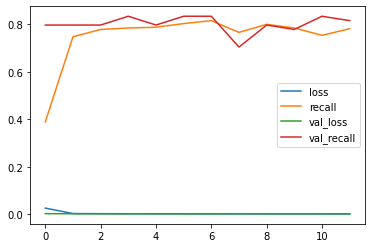

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.0029371303971856833, 0.7473683953285217]

In [ ]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.0029371303971856833
recall :  0.7473683953285217


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56534     7]
 [   24    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56541
           1       0.91      0.75      0.82        95

    accuracy                           1.00     56636
   macro avg       0.95      0.87      0.91     56636
weighted avg       1.00      1.00      1.00     56636



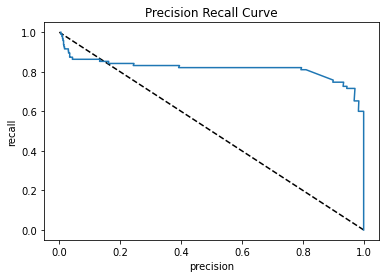

In [ ]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [ ]:
average_precision_score(y_pred, y_pred_proba)

1.0

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [ ]:
tf.random.set_seed(seed) 
recall_1 = make_scorer(recall_score, pos_label =1)
model = Sequential()

model.add(Dense(52, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(26, activation = 'relu'))
model.add(Dense(13, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(6, activation = 'relu'))
#model.add(Dropout(0.25))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr=0.001)
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [ ]:
model.fit(x = X_train, y = y_train, class_weight={0: 0.5, 1: 2}, validation_split = 0.15, batch_size = 128, epochs = 50, verbose =1, callbacks = [early_stop])

Epoch 1/50
1505/1505 [==============================] - 7s 4ms/step - loss: 0.0014 - recall: 0.8981 - val_loss: 0.0048 - val_recall: 0.8519
Epoch 2/50
1505/1505 [==============================] - 7s 4ms/step - loss: 0.0014 - recall: 0.8951 - val_loss: 0.0049 - val_recall: 0.8333
Epoch 3/50
1505/1505 [==============================] - 6s 4ms/step - loss: 0.0015 - recall: 0.8981 - val_loss: 0.0049 - val_recall: 0.8519
Epoch 4/50
1505/1505 [==============================] - 6s 4ms/step - loss: 0.0015 - recall: 0.9167 - val_loss: 0.0052 - val_recall: 0.8519
Epoch 5/50
1505/1505 [==============================] - 6s 4ms/step - loss: 0.0013 - recall: 0.9167 - val_loss: 0.0066 - val_recall: 0.7593
Epoch 6/50
1505/1505 [==============================] - 7s 4ms/step - loss: 0.0014 - recall: 0.9074 - val_loss: 0.0053 - val_recall: 0.8519
Epoch 7/50
1505/1505 [==============================] - 6s 4ms/step - loss: 0.0013 - recall: 0.9259 - val_loss: 0.0060 - val_recall: 0.8519
Epoch 8/50
1505/1505

#### Evaluate

In [ ]:
model.summary()

Model: "sequential_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_775 (Dense)           (None, 52)                1404      
                                                                 
 dense_776 (Dense)           (None, 26)                1378      
                                                                 
 dropout_2 (Dropout)         (None, 26)                0         
                                                                 
 dense_777 (Dense)           (None, 13)                351       
                                                                 
 dense_778 (Dense)           (None, 6)                 84        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_779 (Dense)           (None, 3)              

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.060356,0.000000,0.003599,0.000000
1,0.024374,0.009259,0.005472,0.000000
2,0.017990,0.361111,0.003170,0.833333
3,0.014781,0.614198,0.002468,0.814815
4,0.012906,0.623457,0.002565,0.851852


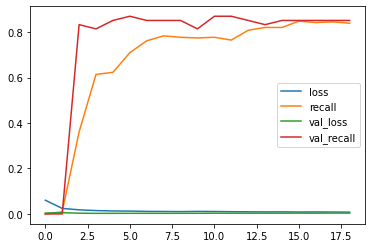

In [ ]:
loss_df.plot();

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.004186525475233793, 0.821052610874176]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.004186525475233793
recall :  [1.         0.98947368 0.98947368 ... 0.02105263 0.01052632 0.        ]


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56518    23]
 [   17    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56541
           1       0.77      0.82      0.80        95

    accuracy                           1.00     56636
   macro avg       0.89      0.91      0.90     56636
weighted avg       1.00      1.00      1.00     56636



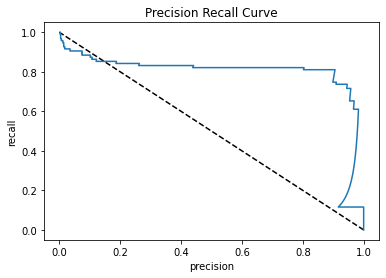

In [ ]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

***v. Prediction and Model Evaluating***

## GridSearchCV

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu'))
    classifier.add(Dense(units = 13, activation = 'relu'))
    classifier.add(Dense(units = 7, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['recall'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 10)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [ ]:
tf.random.set_seed(seed)
recall_1 = make_scorer(recall_score, pos_label =1)
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.15, epochs = 50) 

parameters = {'batch_size': [132, 250],
              'class_weight': ["balanced"], 
              'optimizer': [Adam, RMSprop, Adadelta, Nadam, SGD],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = recall_1,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 5 folds for each of 30 candidates, totalling 150 fits
INFO:tensorflow:Assets written to: ram://b7db092c-c162-4a2f-b5c1-7109c640e511/assets
INFO:tensorflow:Assets written to: ram://9bc74182-2cde-4263-ab21-0d8f8a9fb393/assets
INFO:tensorflow:Assets written to: ram://a3d96155-26cf-4068-9b43-98e9a819af70/assets


exception calling callback for <Future at 0x7f223f23cb10 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.7/dist-packages/keras/saving/pickle_utils.py", line 48, in deserialize_model_from_bytecode
    model = save_module.load_model(temp_dir)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py", line 710, in deserialize_keras_object
    f'Unknown {printable_module_name}: {object_name}. Please ensure '
ValueE

BrokenProcessPool: ignored

In [ ]:
grid_model.best_score_

0.8574652805195051

In [ ]:
grid_model.best_params_

{'batch_size': 250,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.rmsprop.RMSprop}

In [ ]:
grid_model.cv_results_

{'mean_fit_time': array([12.20394139, 10.99221311, 12.91550765,  9.66259861, 10.14199233,
         8.89233246,  9.77189631,  8.96666093,  5.82428102,  6.66426888,
        12.32098012,  7.35383453,  3.96398902,  5.26374979, 14.67019234,
         5.12861595,  4.61595364,  7.25068159,  8.81819448,  5.88613229,
         6.69906435,  6.35017123,  6.18664598,  6.82345781]),
 'mean_score_time': array([3.01515145, 1.54357777, 2.20364776, 2.6304215 , 0.37954497,
        0.53699465, 1.68348279, 2.51944604, 1.81690345, 2.18387904,
        5.74450784, 1.8440731 , 1.3500845 , 1.00268378, 3.99904137,
        1.01375794, 1.84314618, 1.92722483, 6.2750051 , 0.55953493,
        2.04314032, 1.11272249, 1.17404542, 1.1425714 ]),
 'mean_test_score': array([0.84313562, 0.84187807, 0.67720753, 0.84175197, 0.85708729,
        0.84904314, 0.79512072, 0.84791209, 0.84036872, 0.85557928,
        0.79700632, 0.84187871, 0.80882279, 0.81460192, 0.78393278,
        0.81561097, 0.83924391, 0.85746528, 0.79072097, 0

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.843,0.029,10,"{'batch_size': 132, 'learn_rate': 0.001, 'opti..."
1,0.842,0.012,12,"{'batch_size': 132, 'learn_rate': 0.001, 'opti..."
2,0.677,0.237,23,"{'batch_size': 132, 'learn_rate': 0.001, 'opti..."
3,0.842,0.025,13,"{'batch_size': 132, 'learn_rate': 0.001, 'opti..."
4,0.857,0.010,3,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
5,0.849,0.011,7,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
6,0.795,0.010,20,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
7,0.848,0.012,8,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
8,0.840,0.027,14,"{'batch_size': 132, 'learn_rate': 0.005, 'opti..."
9,0.856,0.007,4,"{'batch_size': 132, 'learn_rate': 0.005, 'opti..."


In [ ]:
grid_result.sort_values(by='rank_test_score')

,mean_test_score,std_test_score,rank_test_score,params
17,0.857,0.010,1,"{'batch_size': 250, 'learn_rate': 0.003, 'opti..."
20,0.857,0.008,2,"{'batch_size': 250, 'learn_rate': 0.005, 'opti..."
4,0.857,0.010,3,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
9,0.856,0.007,4,"{'batch_size': 132, 'learn_rate': 0.005, 'opti..."
19,0.855,0.006,5,"{'batch_size': 250, 'learn_rate': 0.003, 'opti..."
21,0.854,0.009,6,"{'batch_size': 250, 'learn_rate': 0.005, 'opti..."
5,0.849,0.011,7,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
7,0.848,0.012,8,"{'batch_size': 132, 'learn_rate': 0.003, 'opti..."
23,0.847,0.008,9,"{'batch_size': 250, 'learn_rate': 0.005, 'opti..."
0,0.843,0.029,10,"{'batch_size': 132, 'learn_rate': 0.001, 'opti..."


#### Evaluate

In [ ]:
y_pred = (grid_model.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1396  187]
 [ 153  254]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1583
           1       0.58      0.62      0.60       407

    accuracy                           0.83      1990
   macro avg       0.74      0.75      0.75      1990
weighted avg       0.83      0.83      0.83      1990



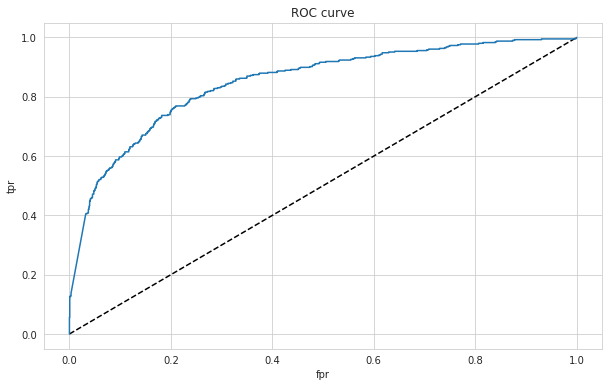

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.8493204052269118

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

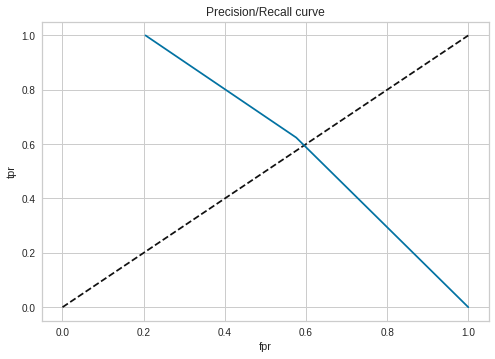

In [ ]:
y_pred_proba = model.predict(X_test_scaled)
fpr, tpr, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Precision/Recall curve')
plt.show()


## Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_ann", 'wb'))

In [ ]:
tf.random.set_seed(seed) 

model = Sequential()

model.add(Dense(13, activation = 'relu', input_dim = X_train_scaled.shape[1]))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.0005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])


In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [ ]:
model.fit(x = X_train_scaled, y = y_train, validation_data = (X_test_scaled, y_test), class_weight={0: 1, 1: 2}, batch_size = 250, epochs = 250, verbose = 1,
          callbacks = [early_stop])

Epoch 1/250
32/32 [==============================] - 1s 8ms/step - loss: 0.8339 - accuracy: 0.7560 - val_loss: 0.6888 - val_accuracy: 0.7809
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8306 - accuracy: 0.7896 - val_loss: 0.6840 - val_accuracy: 0.7915
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8231 - accuracy: 0.7937 - val_loss: 0.6489 - val_accuracy: 0.7940
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7780 - accuracy: 0.7954 - val_loss: 0.5526 - val_accuracy: 0.7955
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7599 - accuracy: 0.7952 - val_loss: 0.5435 - val_accuracy: 0.7955
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7489 - accuracy: 0.7952 - val_loss: 0.5277 - val_accuracy: 0.7955
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7403 - accuracy: 0.7952 - val_loss: 0.5225 - val_accuracy: 0.7955
Epoch 8/250
3

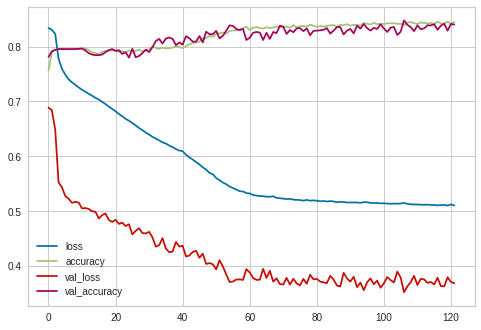

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3683830797672272
accuracy :  0.8402010202407837


In [ ]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1424  159]
 [ 159  248]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1583
           1       0.61      0.61      0.61       407

    accuracy                           0.84      1990
   macro avg       0.75      0.75      0.75      1990
weighted avg       0.84      0.84      0.84      1990



In [ ]:
model.save('model_ann.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_ann = load_model('model_ann.h5')
scaler_ann = pickle.load(open("scaler_ann", "rb"))

### Prediction

In [ ]:
sample_customer = df.drop('Exited', axis = 1).iloc[0:10, :]
sample_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,1,0
5,645,44,8,113755.780,2,1,0,149756.710,0,0,1,0,1
6,822,50,7,0.000,2,1,1,10062.800,1,0,0,0,1
7,376,29,4,115046.740,4,1,0,119346.880,0,1,0,1,0
8,501,44,4,142051.070,2,0,1,74940.500,1,0,0,0,1
9,684,27,2,134603.880,1,1,1,71725.730,1,0,0,0,1


In [ ]:
sample_customer = scaler_ann.transform(sample_customer)
sample_customer

array([[0.538     , 0.42857143, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.516     , 0.41071429, 0.1       , 0.38780208, 0.        ,
        0.        , 1.        , 0.56270874, 0.        , 0.        ,
        1.        , 1.        , 0.        ],
       [0.304     , 0.42857143, 0.8       , 0.73879454, 0.66666667,
        1.        , 0.        , 0.56965435, 1.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.698     , 0.375     , 0.1       , 0.        , 0.33333333,
        0.        , 0.        , 0.46912005, 1.        , 0.        ,
        0.        , 1.        , 0.        ],
       [1.        , 0.44642857, 0.2       , 0.58077317, 0.        ,
        1.        , 1.        , 0.39540036, 0.        , 0.        ,
        1.        , 1.        , 0.        ],
       [0.59      , 0.46428571, 0.8       , 0.52637936, 0.33333333,
        1.        , 0.     

In [ ]:
(model_ann.predict(sample_customer) > 0.5).astype("int32")

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

In [ ]:
model_ann.predict(sample_customer)

array([[0.50601345],
       [0.39745897],
       [0.9940525 ],
       [0.1260097 ],
       [0.25903141],
       [0.12453988],
       [0.05597818],
       [0.9971068 ],
       [0.26765752],
       [0.03998509]], dtype=float32)

In [ ]:
df["Exited"].iloc[0:10]

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

***vi. Plot Precision and Recall Curve***

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Flask API.

### Save and Export the Model as .pkl


In [ ]:
final_model = LogisticRegression(C=0.5, penalty= 'l1', solver= 'saga', class_weight='balanced',max_iter=1000,random_state=101)

In [ ]:
final_model.fit(X, y)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')

In [ ]:
import pickle

In [ ]:
logistic_model = pickle.dump(final_model, open('logistic_model.pkl', 'wb'))

In [ ]:
df_imp_dummied.to_pickle("df_imp_dummied.pkl")

In [ ]:
# Fİnal Random Forest Model 

In [ ]:
X=df_imp.drop(["Class"], axis=1)
y=df_imp["Class"]

In [ ]:
operations = [("encoder" = OrdinalEncoder()), ("over" = SMOTE(sampling_strategy={1: 10000})), ("under" = RandomUnderSampler(sampling_strategy={0: 30000})),("rf_smote",  RandomForestClassifier(n_estimators=400, max_depth=7, class_weight="balanced", random_state=101)]
final_rf_model = Pipeline(steps=operations)

SyntaxError: ignored

In [ ]:
X = 

In [ ]:
final_rf_model.fit(X, y)

NameError: ignored

In [ ]:
final_model = LogisticRegression(C=0.5, penalty= 'l1', solver= 'saga', class_weight='balanced',max_iter=1000,random_state=101)

In [ ]:
final_model.fit(X, y)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')

In [ ]:
import pickle

In [ ]:
logistic_model = pickle.dump(final_model, open('logistic_model.pkl', 'wb'))

In [ ]:
df_imp_dummied

,Amount_Class,V1,V2,V4,V6,V8,V9,V10,V13,V14,V15,V16,Class,Hour_Class_Afternoon,Hour_Class_Evening,Hour_Class_Morning,Hour_Class_Night
0,1,-2.461115,-0.137530,-1.311292,-0.903042,-0.208158,0.693294,0.794438,-0.052147,-0.404189,0.063520,0.875275,0,0,1,0,0
1,2,-0.812460,0.280784,1.310739,0.038560,-0.195905,0.496023,-0.924309,1.747591,1.819428,0.526645,-0.605929,0,0,0,0,1
2,0,-0.287191,-0.307153,-1.349189,-0.462596,-0.051048,-0.910603,0.498691,0.517326,-0.379279,1.120446,1.190317,0,0,0,1,0
3,1,2.035497,0.343118,0.491741,-1.648598,-0.539526,-0.180011,-0.322630,0.056813,-0.549964,0.388555,-0.151466,0,0,0,1,0
4,1,-0.332312,0.347160,-0.268403,-0.720953,-0.445736,1.234178,-0.400833,0.700500,1.978623,-0.698777,-0.179436,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283172,1,1.386619,-0.487157,-0.883990,-0.491958,-0.091224,-1.197717,0.858575,-0.464710,0.591643,0.153299,-0.908373,0,0,1,0,0
283173,0,0.057913,0.844102,-0.601187,-0.633742,0.100760,-0.124133,-0.630250,-1.363453,-0.558885,-0.808723,0.549695,0,1,0,0,0
283174,1,1.868299,-0.183198,0.419068,-0.731672,-0.183749,1.004388,-0.949650,-0.087857,-1.591214,-0.007122,0.040238,0,1,0,0,0
283175,2,1.747050,-1.349595,-0.314099,-0.446187,-0.202085,-0.468403,0.868528,-0.147653,0.525586,-0.177585,-1.471083,0,0,0,1,0


In [ ]:
df_imp_dummied.to_pickle("df_imp_dummied.pkl")

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___